# RQ1

In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt

# OPENING THE FILES (IF YOU PASTE ON JUPYTER NOTEBOOK UPLOAD THE FILES AND JUST PUT 'matches-England.json" AS PATH)
with open('matches_England.json') as json_file:
    matches = json.load(json_file)

with open('teams.json') as json_file:
    teams = json.load(json_file)

# CREATING DATA FRAME FROM FILES
fmatch = pd.DataFrame(matches)
fteams = pd.DataFrame(teams)

In [2]:
# CONSIDERING ONLY CLUB TEAMS FROM THE PREMIER LEAUGE AND PUTTING THEIR IDS IN A LIST
club_teams = fteams[fteams['type'] == 'club']

english_club = club_teams[club_teams.area.apply(lambda x: (x['name'] == 'England' or x['name'] == 'Wales'))]

team_list = english_club['wyId'].tolist()

# ORDERING MATCHES BY WEEKGAME (FROM 1 TO 38)
ordered_matches = fmatch.sort_values(by='gameweek', ascending=True)

print(team_list)


[1613, 1673, 10531, 1659, 1651, 1646, 1631, 1633, 1639, 1644, 1623, 1627, 1625, 1624, 1628, 1619, 1612, 1610, 1611, 1609]


In [3]:
# THIS FUNCTIONS COUNT THE POINT MADE BY EVERY TEAM. IT TAKES AS ARGUMENTS THE TEAM WYID AND A DATAFRAME OF
# MATCHES E RETURNS A TUPLE: (TEAM WYID, RESULTS OF THE TEAM). FOR EVERY WEEKDAY I CHECK THE PLAYED GAMES IN
# WHICH THE GIVEN TEAM PARTECIPATED. IF THE TEAM WON I ADD 3 POINTS, IF IT WAS I TIE I ADD 1, IF IT LOST I ADD 0.
# THE RESULT LIST IS MADE LIKE THIS [0, 0, 3, 6, 9, 9, 10, 11, 14, 14....] WHERE A VALUE AT INDEX I REPRESENTS
# THE POINT THE TEAM HAD AFTER THE GAME ON WEEK I. THE FINAL ELEMENT OF THE LIST IS THE FINAL SCORE OF THE TEAM.

def count_wins(team, match_frame):
    result = []
    for i in range(1, 39):

        week = match_frame[match_frame['gameweek'] == i]
        for index, match in week.iterrows():
            if match['status'] == "Played":
                rivals = list(match['teamsData'].keys())
                rivals = [int(i) for i in rivals]
                if team in rivals:
                    if team == match['winner']:
                        if not result:
                            result.append(3)
                        else:
                            result.append(result[-1] + 3)

                    elif match['winner'] == 0:
                        if not result:
                            result.append(1)
                        else:
                            result.append(result[-1] + 1)
                    else:
                        if not result:
                            result.append(0);
                        else:
                            result.append(result[-1] + 0)
    return (team, result)



In [4]:
# THIS FUNTIONS CALCULATE THE LONGEST WINNING AND LOOSING STRIKE OF A TEAM. THE INPUT IS THE RESULT LIST
# RETURNED BY THE FUNCTION count_wins. I COUNT CONSECUTIVE VICTORIES IN THE WINS VARIABLE; EVERY TIME THIS
# BECOMES GREATER THAN THE BIGGEST STRIKE FOUND I STORE IT IN THE STRIKE VARIABLE. EVERY TIME THE TEAM LOSES
# THE WINS VARIABLE BECOMES ZERO.
# THE loss_strike FUNCTION WORKS IN THE SAME WAY, BUT TO KNOW IF THE TEAM LOST I DON'T HAVE TO CHECK IF ON
# A GIVEN WEEK I HAVE 3 MORE POINT THAN THE PREVIOUS ONE (LIKE FOR THE WINNING STRIKE) BUT IF I HAVE THE SAME
# EXACT SCORE AS THE WEEK BEFORE.

def winning_strike(res):
    strike = 0
    wins = 0
    for i in range(1, len(res)):
        if res[i] == (res[i - 1] + 3):

            wins += 1
            if wins > strike:
                strike = wins
        else:
            wins = 0
    return strike


def loss_strike(res):
    strike = 0
    loss = 0
    for i in range(1, len(res)):
        if res[i] == res[i - 1]:
            loss += 1
            if loss > strike:
                strike = loss
        else:
            loss = 0
    return strike

In [ ]:
# I USE THIS FUNCTION TO FIND THE TEAMS WITH THE LONGER WINNING OR LOSING STRIKES. THE FUNCTION IS THE SAME
# BEACUSE THEY ARE CALCULATED THE SAME WAY, BUT THE INPUT HAS, OF COURSE, DIFFERENT VARIABLES.
# THE INPUT IS: TEAM (THE WYID OF THE TEAM WE ARE EXAMINING) , W_STRIKE (ITS LONGEST WINNING/LOSING STRIKE),
# FIRST (THE LIST WITH THE TEAMS THAT HAVE THE LONGEST WINNING/LOSING STRIKE AT THE MOMENT WE ARE EXAMINING THE
# CURRENT TEAM), SND (THE LIST WITH THE TEAMS THAT HAVE THE SECOND LONGEST WINNING/LOSING STRIKE AT THE MOMENT
# WE ARE EXAMINING THE CURRENT TEAM), STRIKE1 (THE LONGEST WINNING/LOSING STRIKE FOUND AT THE MOMENT) AND STRIKE2
# (THE SECOND LONGEST WINNING/LOSING STRIKE AT THE MOMENT).
# I USED LIST FOR FIRST AND SND IN CASE THERE WERE MORE TEAMS WITH THE SAME STRIKE.
# FOR EVERY TEAM I CHECK IF ITS STRIKE IS LONGER THAN THE ONE I CHECKED BEFORE (STORED IN STRIKE1); IF SO
# THIS TEAM SUBSTITUTES THE TEAM IN THE "FIRST" VARIABLE, AND THE PREVIOUS "FIRST" BECOMES "SND".
# IF THE TEAM AS THE SAME STRIKE AS THE ONE IN THE "FIRST VARIABLE" IT IS ADDED TO THE "FIRST" VARIABLE.
# IF THE TEAM AS A SCORE SMALLER THEN THE ONE OF THE "FIRST" TEAM BUT GREATER THAN THE ONE OF THE "SND", IT
# BECOMES THE VALUE IN THE "SND" VARIABLE.
# IF THE TEAM AS THE SAME SCORE AS THE ONE OF THE "SND", IT IS ADDED TO THE "SND" VARIABLE.

def get_max_strike(team, w_strike, first, snd, strike1, strike2):
    if w_strike > strike1:
        snd.clear()
        snd = snd + first
        first.clear()
        first.append(team)
        strike2 = 0 + strike1
        strike1 = 0 + w_strike

    elif w_strike == strike1:

        first.append(team)

    elif w_strike < strike1 and w_strike > strike2:

        snd.clear()
        snd.append(team)
        strike2 = 0 + w_strike

    elif w_strike == strike2:
        snd.append(team)

    return strike1, strike2


Here you can see for team 1613 its points every week, and afterwards its longest winning strike and losing strike:
(1613, [0, 0, 3, 6, 9, 9, 10, 11, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 18, 18, 19, 22, 23, 23, 24, 25, 28, 29, 29, 32, 32, 35, 38, 41, 41, 41, 41, 44]) W-strike: 3 L-strike: 4
Here you can see for team 1673 its points every week, and afterwards its longest winning strike and losing strike:
(1673, [3, 6, 7, 7, 8, 9, 9, 9, 12, 12, 15, 15, 15, 15, 15, 18, 18, 21, 22, 23, 24, 24, 24, 24, 24, 24, 27, 30, 30, 31, 31, 31, 32, 35, 36, 36, 37, 37]) W-strike: 2 L-strike: 5
Here you can see for team 10531 its points every week, and afterwards its longest winning strike and losing strike:
(10531, [1, 1, 4, 4, 5, 5, 5, 8, 8, 8, 8, 8, 9, 9, 9, 12, 12, 12, 13, 13, 16, 16, 17, 20, 23, 24, 27, 27, 30, 31, 31, 31, 32, 33, 33, 33, 33, 33]) W-strike: 2 L-strike: 4
Here you can see for team 1659 its points every week, and afterwards its longest winning strike and losing strike:
(1659, [0, 0

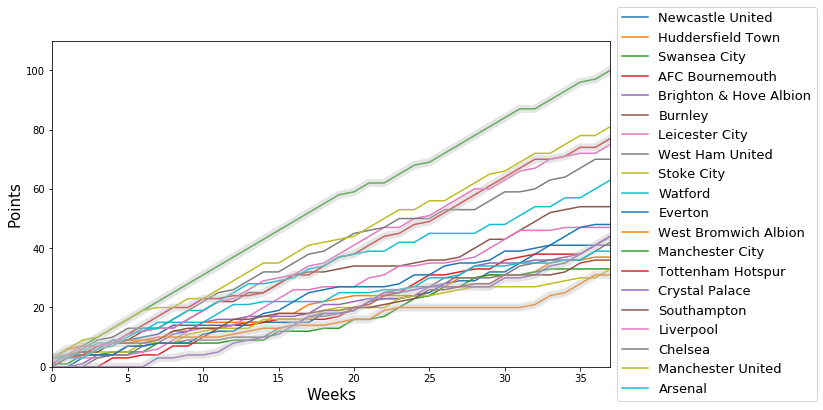

In [34]:
# HERE STARTS THE CORE PART OF THE SCRIPT. FIRSTLY I TAKE THE LIST OF NAMES OF THE PREMIERE LEGUE'S CLUB TEAMS
# SO THAT I CAN USE THE TO LABEL THE PLOT

names = list(english_club['name'])

# I THEN SET THE SIZE OF THE PLOT
plt.figure(figsize=(10, 6))

# AND DEFINE THE VARIABLES THAT I WILL USE TO CALCULATE THE LONGEST STRIKES WITH THE get_max_strike FUNCTION
first_win = [];
first_loss = [];
snd_win = [];
snd_loss = []
wstrike1 = 0;
wstrike2 = 0;
lstrike1 = 0;
lstrike2 = 0

# NOW FOR EVERY TEAM WYID I TAKE ITS NAME, CALCULATE ITS RESULT LIST WITH THE count_wins FUNCTION AND ITS
# WINNING STRIKE AND LOSS STRIKE WITH THE winning_strike AND loss_strike FUNCTIONS

for team in team_list:
    name = names[team_list.index(team)]
    res = count_wins(team, ordered_matches)

    w_strike = winning_strike(res[1])
    l_strike = loss_strike(res[1])

    values = get_max_strike(team, w_strike, first_win, snd_win, wstrike1, wstrike2)
    wstrike1 = values[0];
    wstrike2 = values[1]

    vals = get_max_strike(team, l_strike, first_loss, snd_loss, lstrike1, lstrike2)
    lstrike1 = vals[0];
    lstrike2 = vals[1]
    
    print("Here you can see for team", team,"its points every week, and afterwards its longest winning strike and losing strike:")
    print(res,"W-strike:", w_strike,"L-strike:", l_strike)
    # NOW, INSIDE THE LOOP, EVERY TIME I GET THE RESULT LIST 
    # FOR A TEAM I PLOT IT WITH ITS NAME AS LABEL
    plt.plot(res[1], label=name)

print(" ")
print("Strikes data:", first_win, wstrike1, snd_win, wstrike2, first_loss, lstrike1, snd_loss, lstrike2)


# THEN, I ADD THE CUSTOMIZED LEGEND TO THE PLOT AND DECIDE HOW LOW THE AXES SHOULD BE
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1, prop={'size': 13})
plt.xlim(0, 37)
plt.ylim(0, 110)

# HERE I AM TAKING ALL THE TEAMS ID THAT SHOULD BE HIGHLIGHTED AND FOR EVERYONE OF THEM I PLOT ITS RESULT
# LIST AGAIN, WITH A BOLD SEMI-TRANSPARENT GREY COLORED LINE, SO THAT THEY ARE HIGHLIGHTED BUT IT'S STILL
# POSSIBLE TO SEE THEIR COLOR UNDERNEATH.

special = first_win + snd_win + first_loss + snd_loss
for team in special:
    name = names[team_list.index(team)]
    res = count_wins(team, ordered_matches)
    plt.plot(res[1], marker='', linewidth=8, alpha=0.4, color='0.75')

# FINALLY I LABEL THE AXES WITH A GIVEN FONT SIZE AND GIVE THE COMMAND TO SHOW THE PLOT

plt.xlabel("Weeks", fontsize=15)
plt.ylabel("Points", fontsize=15)

plt.show()

# RQ2

In [1]:
# import libraries
import pandas as pd
import json

In [2]:
# path for json matches file 
pathMatches = 'matches_England.json'
# read the matches file and save to data
with open(pathMatches) as json_matches:
    matches = json.load(json_matches)

In [3]:
# creation of matches dataframe from data
dfMatches = pd.DataFrame(matches)

In [4]:
# path for json teams file 
pathTeams = 'teams.json'
# read the teams file and save to data
with open(pathTeams) as json_teams:
    teams = json.load(json_teams)

In [5]:
# creation of teams dataframe from data
dfTeams = pd.DataFrame(teams)

In [6]:
# select club teams
club_teams = dfTeams[dfTeams['type'] == 'club']

In [7]:
# select teams of premier league
english_clubs = club_teams[club_teams.area.apply(lambda x: (x['name'] == 'England' or x['name'] == 'Wales'))]

In [8]:
# order matches by gameweek
ordered_matches = dfMatches.sort_values(by='gameweek', ascending=True)

In [9]:
# choice of five teams: in this case, the first five teams
five_teams=english_clubs.head(5)
# creation of a list with the five teams' ids
five_teams_list=five_teams['wyId'].tolist()

## Creation of five contingency tables (one per team)

In [10]:
#iteration on the five chosen teams of the list
for i in five_teams_list:
    list=[]  # empty list to save the data for a new structured dataframe
    # iteration on the rows of the dataframe (on every match)
    for index, match in ordered_matches.iterrows():
        match=dict(match)
        # selection of the dictionary with the teams' data of the match
        teamDataDict=(match.get("teamsData"))
        # iteration on the two teams of the match
        for team in teamDataDict.keys():
            # check if the team involved is the chosen one
            if int(team)==i:
            # if it is, append to the list the correct structured data from the match
                # case of home side and draw
                if (teamDataDict[team]["side"]=="home") & (match['winner']==0):
                    list.append(["home", "draw"])
                # case of away side and draw
                elif (teamDataDict[team]["side"]=="away") & (match['winner']==0):
                    list.append(["away", "draw"])
                # case of home side and win
                elif (teamDataDict[team]["side"]=="home") & (match['winner']==i):
                    list.append(["home", "win"])
                # case of home side and lose
                elif (teamDataDict[team]["side"]=="home") & (match['winner']!=i):
                    list.append(["home", "lose"])
                # case of away side and win
                elif (teamDataDict[team]["side"]=="away") & (match['winner']==i):
                    list.append(["away", "win"])
                # case of away side and lose
                elif (teamDataDict[team]["side"]=="away") & (match['winner']!=i):
                    list.append(["away", "lose"])
    print(five_teams.loc[five_teams.wyId ==i]['name'])
    # creation of a dataframe from the created list
    df=pd.DataFrame(list, columns=['side','result'])
    # contingency table that shows the correlation between the outcome of the game and the playing side
    print(pd.crosstab(df.side, df.result))
                

0    Newcastle United
Name: name, dtype: object
result  draw  lose  win
side                   
away       4    11    4
home       4     7    8
8    Huddersfield Town
Name: name, dtype: object
result  draw  lose  win
side                   
away       5    11    3
home       5     8    6
19    Swansea City
Name: name, dtype: object
result  draw  lose  win
side                   
away       6    11    2
home       3    10    6
26    AFC Bournemouth
Name: name, dtype: object
result  draw  lose  win
side                   
away       6     9    4
home       5     7    7
27    Brighton & Hove Albion
Name: name, dtype: object
result  draw  lose  win
side                   
away       6    11    2
home       8     4    7


## Creation of a single contingency table, excluding the matches that the five teams played among themselves

In [11]:
# empty list to save the data for a new structured dataframe
l=[]
# iteration on the rows of the dataframe (on every match)
for index, match in ordered_matches.iterrows():
    match=dict(match)
    # selection of the dictionary with the teams' data of the match
    teamDataDict=(match.get("teamsData"))
    # keys of the dictionary with teams' data (ids of the two teams)
    teamDataKeys = []
    for key in teamDataDict.keys():
        teamDataKeys.append(key)
    # check if not both teams of the match are in the five teams' list
    if (int(teamDataKeys[0]) not in five_teams_list) or (int(teamDataKeys[1]) not in five_teams_list):
        # if the first is in the list
        if int(teamDataKeys[0]) in five_teams_list:
            if (teamDataDict[teamDataKeys[0]]["side"]=="home") & (match['winner']==0):
                l.append(["home", "draw"])
            elif (teamDataDict[teamDataKeys[0]]["side"]=="away") & (match['winner']==0):
                l.append(["away", "draw"])
            elif (teamDataDict[teamDataKeys[0]]["side"]=="home") & (match['winner']==int(teamDataKeys[0])):
                l.append(["home", "win"])
            elif (teamDataDict[teamDataKeys[0]]["side"]=="home") & (match['winner']!=int(teamDataKeys[0])):
                l.append(["home", "lose"])
            elif (teamDataDict[teamDataKeys[0]]["side"]=="away") & (match['winner']==int(teamDataKeys[0])):
                l.append(["away", "win"])
            elif (teamDataDict[teamDataKeys[0]]["side"]=="away") & (match['winner']!=int(teamDataKeys[0])):
                l.append(["away", "lose"])
        # if the second is in the list
        elif int(teamDataKeys[1]) in five_teams_list:
            if (teamDataDict[teamDataKeys[1]]["side"]=="home") & (match['winner']==0):
                l.append(["home", "draw"])
            elif (teamDataDict[teamDataKeys[1]]["side"]=="away") & (match['winner']==0):
                l.append(["away", "draw"])
            elif (teamDataDict[teamDataKeys[1]]["side"]=="home") & (match['winner']==int(teamDataKeys[1])):
                l.append(["home", "win"])
            elif (teamDataDict[teamDataKeys[1]]["side"]=="home") & (match['winner']!=int(teamDataKeys[1])):
                l.append(["home", "lose"])
            elif (teamDataDict[teamDataKeys[1]]["side"]=="away") & (match['winner']==int(teamDataKeys[1])):
                l.append(["away", "win"])
            elif (teamDataDict[teamDataKeys[1]]["side"]=="away") & (match['winner']!=int(teamDataKeys[1])):
                l.append(["away", "lose"])
# creation of the dataframe from the created list
df=pd.DataFrame(l, columns=['side','result'])
# creation of the contingency table from the created dataframe
ct=pd.crosstab(df.side, df.result)
print(ct)

result  draw  lose  win
side                   
away      20    43   12
home      18    33   24


In [12]:
# import required library for the chi-squared test
from scipy.stats import chi2_contingency

In [13]:
# chi-squared test and save values
chi2, p, dof, ex = chi2_contingency(ct)

In [14]:
print(chi2)

5.421052631578947


In [15]:
print(p)

0.06650179655706923


In [16]:
print(ex)

[[19. 38. 18.]
 [19. 38. 18.]]


#### The hypotheses of this chi-squared test were:
-  H0 (null hypothesis): The outcome of the game and the playing side are correlated between each other
-  Ha (alternative hypothesis): The outcome of the game and the playing side are not correlated between each other

#### The p-value obtained with the test on these five teams is 0.06650179655706923, slightly larger than 0.05 (taken as critical level). Our value is larger than the critical value but not so much. Anyway, we will reject the null hypothesis, and so we can consider the outcome of the game and the playing side not so much correlated.

# RQ 3

In [3]:
import pandas as pd
import json
from datetime import date


# OPENING THE FILES (IF YOU PASTE ON JUPYTER NOTEBOOK UPLOAD THE FILES AND JUST PUT 'matches-England.json" AS PATH)
with open('coaches.json') as json_file:
    coaches = json.load(json_file)

with open('teams.json') as json_file:
    teams = json.load(json_file)

with open('matches_England.json') as json_file:
    matches = json.load(json_file)

# CREATING DATA FRAME FROM FILES
fcoach = pd.DataFrame(coaches)
fteams = pd.DataFrame(teams)
fmatch = pd.DataFrame(matches)

# CONSIDERING ONLY CLUB TEAMS FROM THE PREMIER LEAUGE AND PUTTING THEIR IDS IN A LIST
club_teams = fteams[fteams['type'] == 'club']
english_club = club_teams[club_teams.area.apply(lambda x: (x['name'] == 'England' or x['name'] == 'Wales'))]
team_list = english_club['wyId'].tolist()

print(team_list)

[1613, 1673, 10531, 1659, 1651, 1646, 1631, 1633, 1639, 1644, 1623, 1627, 1625, 1624, 1628, 1619, 1612, 1610, 1611, 1609]


In [4]:
# ORDERING THE COACHES BY AGE AND SAVING A LIST OF THEIR ORDERED NAMES
fcoach = fcoach.sort_values(by=["birthDate"], ascending=False)
ordered_coaches = fcoach['wyId'].tolist()

print(ordered_coaches)

[272299, 447924, 367510, 391523, 117648, 25683, 296896, 261672, 83888, 228372, 3500, 267555, 20407, 8934, 71037, 190909, 261661, 20747, 251025, 143326, 18987, 8214, 198390, 116503, 167044, 251044, 70160, 337062, 21061, 293398, 546966, 434992, 19925, 270032, 210254, 8605, 218066, 21414, 531745, 275283, 266522, 25926, 292863, 272970, 444778, 381291, 15470, 216136, 3265, 18572, 251201, 254174, 355598, 8880, 101575, 228386, 267136, 215903, 107408, 276858, 136439, 420376, 268775, 93112, 3427, 230918, 4258, 333560, 5326, 90162, 210119, 259751, 537833, 8329, 272869, 20454, 136636, 206965, 210120, 23551, 301696, 25549, 140684, 269869, 5149, 86569, 333641, 275291, 17121, 9092, 240612, 525079, 20386, 15824, 26243, 210121, 357389, 14791, 57369, 3880, 18702, 16837, 122788, 4054, 292972, 211238, 25842, 264939, 25751, 266521, 14735, 32573, 20665, 26812, 210074, 14977, 225952, 28158, 169425, 484354, 15114, 220743, 20603, 4784, 4107, 25691, 149135, 92894, 20860, 82503, 638, 210146, 9054, 333782, 24691

In [5]:
# THIS FUNCTION CONTROLS WHICH OF THE COACHES OF A TEAM IS THE YOUNGEST. VALS IS A LIST OF LISTS; EVERY INNER
# LIST IS MADE OF TWO ELEMENTS, THE TEAM AND THE COACH ID. I TAKE ALL THE COACHES ID AND CHECK WHICH ONE HAS
# THE SMALLER INDEX IN THE ORDERED LIST OF COACH (HE WILL BE THE YOUNGEST COACH AMONG THE CONSIDERED ONES).
# THE OUTPUT IS A TUPLE WITH THE TEAM ID AND THE COACH ID.


def find_younger(vals, ord_coaches_list):

    coaches_id = [el[1] for el in vals]
    younger = 0
    i = 0
    nested = []
    for c in coaches_id:
        pos = ord_coaches_list.index(c)
        if i == 0 or pos < i:
            i = pos
            younger = c
    for e in vals:
        if younger in e:
            nested = e
    teamid = nested[0]
    return younger, teamid

In [6]:
# CREATING AN EMPTY DATAFRAME TO USE LATER

teamNcoach = pd.DataFrame(columns=["wyId", "coachId"])

# HERE I AM ADDING ROWS TO THE NEW DATAFRAME. EVERY ROW I ADD IS MADE OF THE TEAM ID OF
# A PREMIER LEAGUE TEAMS AND A COACH ID OF A COACH THEY HAVE. A TEAM MAY APPEAR IN MULTIPLE
# ROWS WITH DIFFERENT COACHES ID IF IT HAD DIFFERENT COACHES DURING THE SEASON.
# TO DO THIS I ITERATE OVER THE ROWS OF THE MATCHES DATAFRAME, CONSIDER THE ENTRY "TEAMS DATA"
# AND CHECK IF THE TEAM IS ENGLISH (IS IN TEAM_LIST). IF SO AND IF THE SAME COUPLE TEAM-COACH
# WASN'T PREVIOUSLY ADDED TO THE DATAFRAME AND THE COACH IS ONE OF THE ONES IN MY COACH DATAFRAME,
# IF APPEND THE NEW ROW TO THE DATAFRAME.

for index, match in fmatch.iterrows():

    match = dict(match)
    teamDataDict = (match.get("teamsData"))

    for team in teamDataDict.keys():

        if int(team) in team_list:

            if not ((teamNcoach['wyId'] == team) & (teamNcoach['coachId'] == teamDataDict[team]["coachId"])).any():
                if teamDataDict[team]["coachId"] in ordered_coaches:
                    df2 = pd.DataFrame([[team, teamDataDict[team]["coachId"]]], columns=["wyId", "coachId"])
                    teamNcoach = teamNcoach.append(df2)
                    
print(teamNcoach)

    wyId coachId
0   1646    8880
0   1659    8934
0   1628    8357
0   1609    7845
0   1673   18572
0   1651    8093
0   1612   14791
0   1644   93112
0   1611    3295
0   1613  210700
0   1610  272869
0   1625  267136
0   1619    9054
0  10531   32573
0   1639    8329
0   1631  209010
0   1623    8541
0   1633    8235
0   1624  292863
0   1610   20454
0   1627    7973
0   1619  254174
0   1644   71037
0   1639    9054
0  10531  381291
0   1623  434992
0   1627    9454
0   1627  149026
0   1633  269869
0   1623  268779
0   1631    8214
0   1631  333782
0   1613  531745
0   1628  268775


In [7]:
# I THEN REMOVE THE LINES WHERE A TEAM IS ASSOCIATED WITH NO COACH AND CALCULATE AGAIN THE TEAM LIST

teamNcoach_filt = teamNcoach[teamNcoach['coachId'] != 0]
team_list = list(teamNcoach_filt['wyId'])

#print(teamNcoach)
#print("Team List:", team_list)

In [8]:
# I CREATE A NEW EMPTY DATAFRAME
last_df = pd.DataFrame(columns=["wyId", "coachId"])

# NOW I ITERATE OVER THE ROWS OF THE PREVIOUSLY POPULATED DATAFRAME AND CHECK THE TEAMS THAT APPEAR In MORE LINES
# WITH DIFFERENT COACHES. I TAKE THOSE LINES AND STORE THE COUPLES TEAM-COACH IN THE VALS NESTED LIST.
# I USE THE FIND_YOUNGER FUNCTION TO FIND WHICH OF THESE COACHES IS THE YOUNGEST AND THEN ADD THE ROW TEAM-YOUNGEST
# COACH TO THE NEW DATAFRAME CREATED. I ALSO ADD TO THIS DATAFRAME ALL THE ROWS ABOUT TEAM WITH NO MULTIPLE COACHES.

for index, row in teamNcoach_filt.iterrows():
    row = list(row)
    if sum(row[0] in t for t in team_list) > 1:

        temp_df = teamNcoach_filt.loc[teamNcoach_filt['wyId'] == row[0]]
        values = temp_df.values

        youngest = find_younger(values, ordered_coaches)
        t = teamNcoach_filt['coachId'] == row[0]
        last_df = last_df.append(pd.DataFrame([[youngest[1], youngest[0]]], columns=["wyId", "coachId"]))

    else:
        last_df = last_df.append(pd.DataFrame([[row[0], row[1]]], columns=["wyId", "coachId"]))
        
print(last_df)

    wyId coachId
0   1646    8880
0   1659    8934
0   1628  268775
0   1609    7845
0   1673   18572
0   1651    8093
0   1612   14791
0   1644   71037
0   1611    3295
0   1613  531745
0   1610  272869
0   1625  267136
0   1619  254174
0  10531  381291
0   1639    8329
0   1631    8214
0   1623  434992
0   1633  269869
0   1624  292863
0   1610  272869
0   1627    7973
0   1619  254174
0   1644   71037
0   1639    8329
0  10531  381291
0   1623  434992
0   1627    7973
0   1627    7973
0   1633  269869
0   1623  434992
0   1631    8214
0   1631    8214
0   1613  531745
0   1628  268775


In [9]:
# NOW I REMOVE DUPLICATE ROWS FROM THE DATAFRAME AND JOIN IT WITH THE COACHES DATAFRAM TO GET MORE INFO
# ABOUT THE COACHES. I ORDER THE JOINED DATAFRAME BY DESCENDING BIRTH DATE OF THE COACHES. THEN I SAVE
# THE ORDERED TEAM IDS IN A LIST AND PRINT THE FIRST TEN ELEMENTS OF THIS LIST

last_df = last_df.drop_duplicates()
final_df = pd.merge(last_df, fcoach, left_on='coachId', right_on="wyId", how='left')
final_df = final_df.sort_values(by=["birthDate"], ascending=False)
y_teams = final_df["wyId_x"].tolist()
result = y_teams[:10]
print(result)

['1659', '1644', '1631', '1623', '1613', '1624', '10531', '1673', '1619', '1646']


### NOW PART 2

In [10]:
# NOW I PUT THE LIST OF COACHES THAT WERE ASSIGN TO A PREMIERE LEAGUE TEAM INTO A LIST (NOTICE THAT I USE
# THE OLD DATAFRAME, WHERE A TEAM COULD BE IN MULTIPLE ROWS WITH DIFFERENT COACHES, BECAUSE I WANT ALL
# THE COACHES WHO PARTICIPATED AT LEAST ONCE IN A PREMIER LEAGUE MATCH.
# I THEN JOIN THE SAME DATAFRAME WITH THE COACH DATAFRAME TO GET ALL THEIR INFORMATION AND KEEP ONLY THE
# COLUMNS ABOUT THE TEAM ID, THE COACH ID AND THE BIRTH DATE.

english_coach = teamNcoach_filt["coachId"].tolist()
age_df = pd.merge(teamNcoach_filt, fcoach, left_on='coachId', right_on="wyId", how='left')
age_df = age_df[["wyId_x", "coachId", "birthDate"]]
print(age_df)

   wyId_x coachId   birthDate
0    1646    8880  1971-06-28
1    1659    8934  1977-11-29
2    1628    8357  1947-08-09
3    1609    7845  1949-10-22
4    1673   18572  1971-10-19
5    1651    8093  1958-12-11
6    1612   14791  1967-06-16
7    1644   93112  1970-05-01
8    1611    3295  1963-01-26
9    1613  210700  1960-04-16
10   1610  272869  1969-07-31
11   1625  267136  1971-01-18
12   1619    9054  1963-11-01
13  10531   32573  1965-12-04
14   1639    8329  1969-08-07
15   1631  209010  1961-09-02
16   1623    8541  1954-10-19
17   1633    8235  1963-04-25
18   1624  292863  1972-03-02
19   1610   20454  1969-07-31
20   1627    7973  1961-07-18
21   1619  254174  1971-10-05
22   1644   71037  1977-07-12
23   1639    9054  1963-11-01
24  10531  381291  1972-01-08
25   1623  434992  1973-10-16
26   1627    9454  1959-05-02
27   1627  149026  1958-01-16
28   1633  269869  1968-09-11
29   1623  268779  1963-03-21
30   1631    8214  1975-12-04
31   1631  333782  1963-10-26
32   1613 

In [11]:
# THIS FUNCTION CALCULATES THE CURRENT AGE GIVEN A BIRTH DATE

def calculateAge(birthDate):
    today = date.today()
    age = today.year - birthDate.year - ((today.month, today.day) < (birthDate.month, birthDate.day))
    return age

In [12]:
# NOW FOR EVERY ROW OF THE AGE_DF DATAFRAME (THE ONE WITH IDS AND BIRTH DATES) I TAKE THE BIRTH DATES,
# USE THEM TO CALCULATE THE AGES OF THE RESPECTIVE COACHES AND THEN STORE THESE AGES IN A LIST.

age_list = []
for index, row in age_df.iterrows():
    line = row
    row = list(row)
    if row[1] in english_coach:
        birth = line["birthDate"]
        y = int(birth[:4])
        m = int(birth[5:7])
        d = int(birth[8:])
        age = calculateAge(date(y, m, d))
        age_list.append(age)
        print(birth, y, m, d, age)

1971-06-28 1971 6 28 48
1977-11-29 1977 11 29 41
1947-08-09 1947 8 9 72
1949-10-22 1949 10 22 70
1971-10-19 1971 10 19 48
1958-12-11 1958 12 11 60
1967-06-16 1967 6 16 52
1970-05-01 1970 5 1 49
1963-01-26 1963 1 26 56
1960-04-16 1960 4 16 59
1969-07-31 1969 7 31 50
1971-01-18 1971 1 18 48
1963-11-01 1963 11 1 55
1965-12-04 1965 12 4 53
1969-08-07 1969 8 7 50
1961-09-02 1961 9 2 58
1954-10-19 1954 10 19 65
1963-04-25 1963 4 25 56
1972-03-02 1972 3 2 47
1969-07-31 1969 7 31 50
1961-07-18 1961 7 18 58
1971-10-05 1971 10 5 48
1977-07-12 1977 7 12 42
1963-11-01 1963 11 1 55
1972-01-08 1972 1 8 47
1973-10-16 1973 10 16 46
1959-05-02 1959 5 2 60
1958-01-16 1958 1 16 61
1968-09-11 1968 9 11 51
1963-03-21 1963 3 21 56
1975-12-04 1975 12 4 43
1963-10-26 1963 10 26 56
1973-02-19 1973 2 19 46
1970-05-15 1970 5 15 49


   wyId_x coachId   birthDate  age
0    1646    8880  1971-06-28   48
1    1659    8934  1977-11-29   41
2    1628    8357  1947-08-09   72
3    1609    7845  1949-10-22   70
4    1673   18572  1971-10-19   48
5    1651    8093  1958-12-11   60
6    1612   14791  1967-06-16   52
7    1644   93112  1970-05-01   49
8    1611    3295  1963-01-26   56
9    1613  210700  1960-04-16   59
10   1610  272869  1969-07-31   50
11   1625  267136  1971-01-18   48
12   1619    9054  1963-11-01   55
13  10531   32573  1965-12-04   53
14   1639    8329  1969-08-07   50
15   1631  209010  1961-09-02   58
16   1623    8541  1954-10-19   65
17   1633    8235  1963-04-25   56
18   1624  292863  1972-03-02   47
19   1610   20454  1969-07-31   50
20   1627    7973  1961-07-18   58
21   1619  254174  1971-10-05   48
22   1644   71037  1977-07-12   42
23   1639    9054  1963-11-01   55
24  10531  381291  1972-01-08   47
25   1623  434992  1973-10-16   46
26   1627    9454  1959-05-02   60
27   1627  149026  1

[Text(0, 0.5, 'age'), Text(0.5, 0, 'teams')]

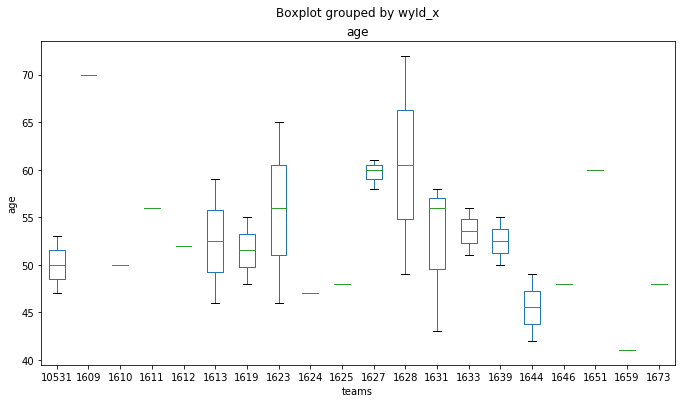

In [16]:
# NOW I USE THE LIST AS A NEW COLUMN OF THE AGE_DF DATAFRAME AND CREATE A BOXPLOT
# WHICH SHOWS THE AGE DISTRIBUTION OF COACHES (Y AXE) FOR EVERY TEAM OF THE PREMIER
# LEAGUE (X AXE), WITH A GIVEN SIZE. LASTLY I LABEL THE AXES.

df = pd.DataFrame({'age': age_list})
age_df["age"] = df
print(age_df)

ax = age_df.boxplot(by="wyId_x", column=["age"], grid=False, figsize=(11, 6))
ax.set(xlabel="teams", ylabel="age")

# RQ4

In [1]:
import json
import pandas as pd
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt


In [2]:
teams = pd.read_json(r"C:\Users\Admin\Desktop\ADM\HW2\teams.json")
players = pd.read_json(r"C:\Users\Admin\Desktop\ADM\HW2\players.json")
coaches = pd.read_json(r"C:\Users\Admin\Desktop\ADM\HW2\coaches.json")

events_England = pd.read_json(r"C:\Users\Admin\Desktop\ADM\HW2\events\events_England.json")
events_European_Championship = pd.read_json(r"C:\Users\Admin\Desktop\ADM\HW2\events\events_European_Championship.json")
events_France = pd.read_json(r"C:\Users\Admin\Desktop\ADM\HW2\events\events_France.json")
events_Germany = pd.read_json(r"C:\Users\Admin\Desktop\ADM\HW2\events\events_Germany.json")
events_Italy = pd.read_json(r"C:\Users\Admin\Desktop\ADM\HW2\events\events_Italy.json")
events_Spain = pd.read_json(r"C:\Users\Admin\Desktop\ADM\HW2\events\events_Spain.json")
events_World_Cup = pd.read_json(r"C:\Users\Admin\Desktop\ADM\HW2\events\events_World_Cup.json")

In [3]:
#Normalize data in order get Player names
df_players_birthArea=pd.DataFrame(json_normalize(players['birthArea']))
df_players_passportArea=pd.DataFrame(json_normalize(players['passportArea']))
df_players_role=pd.DataFrame(json_normalize(players['role']))

In [4]:
df_players = pd.DataFrame(players)

In [5]:
df_players_F = pd.concat([df_players_birthArea, df_players.loc[:,'birthDate':'middleName'],df_players_passportArea,df_players_role,df_players.loc[:,'shortName':'wyId']], axis=1, join='inner')

In [6]:
#convert all json Event files to the DataFrame and merge them
df_events_England=pd.DataFrame(events_England)
df_events_European_Championship=pd.DataFrame(events_European_Championship)
df_events_France=pd.DataFrame(events_France)
df_events_Germany=pd.DataFrame(events_Germany)
df_events_Italy=pd.DataFrame(events_Italy)
df_events_Spain=pd.DataFrame(events_Spain)
df_events_World_Cup=pd.DataFrame(events_World_Cup)

In [7]:
df_events_F = pd.concat([df_events_England, df_events_European_Championship, df_events_France, df_events_Germany, df_events_Italy,df_events_Spain,df_events_World_Cup],axis=0, join='inner')

In [8]:
df_players_F.head(5)


,alpha2code,alpha3code,id,name,birthDate,currentNationalTeamId,currentTeamId,firstName,foot,height,...,alpha2code,alpha3code,id,name,code2,code3,name,shortName,weight,wyId
0,TR,TUR,792,Turkey,1989-06-17,4687,4502,Harun,right,187,...,TR,TUR,792,Turkey,GK,GKP,Goalkeeper,H. Tekin,78,32777
1,FR,FRA,250,France,1999-01-23,4423,3775,Malang,left,182,...,SN,SEN,686,Senegal,DF,DEF,Defender,M. Sarr,73,393228
2,FR,FRA,250,France,1998-10-26,null,3772,Over,,176,...,FR,FRA,250,France,GK,GKP,Goalkeeper,O. Mandanda,72,393230
3,FR,FRA,250,France,1990-03-06,19314,683,Alfred John Momar,right,187,...,SN,SEN,686,Senegal,MD,MID,Midfielder,A. N'Diaye,82,32793
4,FR,FRA,250,France,1999-05-25,null,2975,Ibrahima,right,192,...,FR,FRA,250,France,DF,DEF,Defender,I. Konat\u00e9,84,393247


In [9]:
#select necesarry columns
df_events_id = pd.DataFrame(df_events_F, columns = ["playerId","eventName"])

In [10]:
#Select 'pass' events only
df_events_id=df_events_id[df_events_id.eventName=="Pass"]

In [11]:
#count freq. in order to apply threshold and select passes more than 100 per player
df_events_id_1=(df_events_id.groupby('playerId').count()>100)


In [12]:
df_events_id_1.head(5)

,eventName
playerId,
0,False
12,False
33,False
36,True
38,True


In [13]:
df_events_F.head(5)

,eventId,eventName,eventSec,id,matchId,matchPeriod,playerId,positions,subEventId,subEventName,tags,teamId
0,8,Pass,2.758649,177959171,2499719,1H,25413,"[{'y': 49, 'x': 49}, {'y': 78, 'x': 31}]",85,Simple pass,[{'id': 1801}],1609
1,8,Pass,4.946850,177959172,2499719,1H,370224,"[{'y': 78, 'x': 31}, {'y': 75, 'x': 51}]",83,High pass,[{'id': 1801}],1609
2,8,Pass,6.542188,177959173,2499719,1H,3319,"[{'y': 75, 'x': 51}, {'y': 71, 'x': 35}]",82,Head pass,[{'id': 1801}],1609
3,8,Pass,8.143395,177959174,2499719,1H,120339,"[{'y': 71, 'x': 35}, {'y': 95, 'x': 41}]",82,Head pass,[{'id': 1801}],1609
4,8,Pass,10.302366,177959175,2499719,1H,167145,"[{'y': 95, 'x': 41}, {'y': 88, 'x': 72}]",85,Simple pass,[{'id': 1801}],1609


In [14]:
#select playerid and tags 
df_events_id = pd.DataFrame(df_events_F, columns = ["playerId","tags","eventName"])
df_events_id=df_events_id[df_events_id.eventName=="Pass"]
df_events_id=df_events_id.drop(columns='eventName')
df_events_id.head(5)

In [18]:
# we will store into this dictionary is a playerid as a key 
# and the ratio between completed passes and attempted passes as a value
# ex. {playerID: ratio}
dict = {}
#In this loop we define a set of individual playerIds and iterate through this set
for playerid in set(df_events_id.playerId):
    # for each playerid we collect all the tags stored in the nested structure of lists and dictionaries
    # and store them in the list "ls"
    ls = list(df_events_id[df_events_id.playerId == playerid].tags)
    # we are going to use the list "fin" to store all the tag values for unique playerid
    fin = []
    for i in ls:
        for j in i:
            # adding each tag value
            fin.append(j['id'])
    # round(fin.count(1801)/len(fin),2) this expression computes the ratio we need.
    # we use ternary conditional operator in order to avoid division by zero
    dict[playerid] = 0 if len(fin)==0 else round(fin.count(1801)/len(fin),2)
print(dict)

{8192: 0.57, 0: 0.35, 368642: 0.67, 57347: 0.82, 344068: 0.8, 344065: 0.66, 8200: 0.86, 122888: 0.85, 344075: 0.51, 393228: 0.83, 12: 0.75, 8213: 0.72, 114709: 0.79, 32793: 0.8, 16411: 0.85, 8221: 0.6, 32798: 0.88, 139295: 0.64, 393247: 0.78, 33: 0.7, 32803: 0.0, 36: 0.83, 114723: 0.78, 38: 0.72, 122918: 0.88, 45: 0.68, 8239: 0.68, 48: 0.82, 8240: 0.6, 8242: 0.75, 16435: 0.56, 16436: 0.63, 8245: 0.72, 54: 0.68, 245813: 0.52, 56: 0.69, 8249: 0.81, 8246: 0.69, 229427: 0.77, 65596: 0.56, 16443: 0.73, 344120: 0.78, 122940: 0.69, 8247: 0.75, 66: 0.61, 393284: 0.65, 344132: 0.74, 352328: 0.56, 8266: 0.79, 74: 0.89, 8268: 0.68, 376908: 0.72, 77: 0.81, 41034: 0.75, 8272: 0.7, 344140: 0.56, 114762: 0.68, 8277: 0.8, 8278: 0.63, 91: 0.6, 8284: 0.6, 93: 0.54, 8285: 0.72, 8287: 0.8, 41056: 0.78, 97: 0.8, 8290: 0.62, 8291: 0.82, 8292: 0.65, 99: 0.86, 102: 0.84, 286823: 1.0, 8296: 0.62, 286825: 0.59, 8297: 0.5, 107: 0.61, 8301: 0.74, 110: 0.61, 286831: 0.71, 131184: 0.57, 8303: 0.72, 344178: 0.79, 83

In [19]:
#converting dictionary to a DataFrame
full_list = pd.DataFrame({'success': dict})

In [20]:
full_list.head()

,success
0,0.35
12,0.75
33,0.70
36,0.83
38,0.72


In [21]:
#merge two data frame and select more than 100 attempt
full_list_F= pd.merge(full_list, df_events_id_1, left_index=True, right_index=True)
full_list_F=full_list_F[full_list_F.eventName==True]
full_list_F=full_list_F.drop(['eventName'], axis=1)
full_list_F.head(5)

In [25]:
#adding names of players
df_players_F = df_players_F[["shortName","wyId"]]
df_players_F = df_players_F.set_index('wyId')
df_pass = full_list_F.sort_values(by='success', ascending=False)
top_10_players=pd.merge(df_pass, df_players_F, left_index=True, right_index=True).head(10)

In [32]:
top_10_players

,success,shortName
8034,0.94,D. Boyata
9380,0.94,J. Stones
61425,0.93,M. Milligan
94814,0.92,G. Sh\u014dji
266286,0.92,Marlon
25784,0.92,A. Abdennour
20394,0.92,Thiago Silva
231138,0.91,P. Kimpembe
214609,0.91,Y. Cardinale
21006,0.91,L. Tonelli


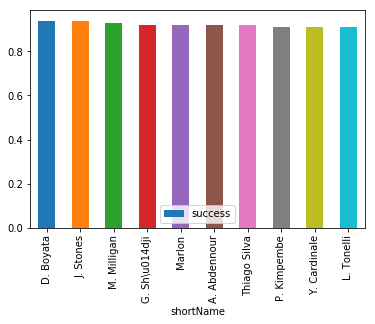

In [33]:
top_10_players.plot(kind='bar',x="shortName",y="success")

# RQ 5

In [1]:
import json
import pandas as pd
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt


In [2]:
teams = pd.read_json(r"C:\Users\Admin\Desktop\ADM\HW2\teams.json")
players = pd.read_json(r"C:\Users\Admin\Desktop\ADM\HW2\players.json")
coaches = pd.read_json(r"C:\Users\Admin\Desktop\ADM\HW2\coaches.json")

events_England = pd.read_json(r"C:\Users\Admin\Desktop\ADM\HW2\events\events_England.json")
events_European_Championship = pd.read_json(r"C:\Users\Admin\Desktop\ADM\HW2\events\events_European_Championship.json")
events_France = pd.read_json(r"C:\Users\Admin\Desktop\ADM\HW2\events\events_France.json")
events_Germany = pd.read_json(r"C:\Users\Admin\Desktop\ADM\HW2\events\events_Germany.json")
events_Italy = pd.read_json(r"C:\Users\Admin\Desktop\ADM\HW2\events\events_Italy.json")
events_Spain = pd.read_json(r"C:\Users\Admin\Desktop\ADM\HW2\events\events_Spain.json")
events_World_Cup = pd.read_json(r"C:\Users\Admin\Desktop\ADM\HW2\events\events_World_Cup.json")

In [3]:
#Normalize data in order get Player names
df_players_birthArea=pd.DataFrame(json_normalize(players['birthArea']))
df_players_passportArea=pd.DataFrame(json_normalize(players['passportArea']))
df_players_role=pd.DataFrame(json_normalize(players['role']))

In [4]:
df_players = pd.DataFrame(players)
df_players_F = pd.concat([df_players_birthArea, df_players.loc[:,'birthDate':'middleName'],df_players_passportArea,df_players_role,df_players.loc[:,'shortName':'wyId']], axis=1, join='inner')

In [5]:
#convert all json Event files to the DataFrame and merge them
df_events_England=pd.DataFrame(events_England)
df_events_European_Championship=pd.DataFrame(events_European_Championship)
df_events_France=pd.DataFrame(events_France)
df_events_Germany=pd.DataFrame(events_Germany)
df_events_Italy=pd.DataFrame(events_Italy)
df_events_Spain=pd.DataFrame(events_Spain)
df_events_World_Cup=pd.DataFrame(events_World_Cup)

In [6]:
df_events_F = pd.concat([df_events_England, df_events_European_Championship, df_events_France, df_events_Germany, df_events_Italy,df_events_Spain,df_events_World_Cup],axis=0, join='inner')

In [7]:
df_events_F

,eventId,eventName,eventSec,id,matchId,matchPeriod,playerId,positions,subEventId,subEventName,tags,teamId
0,8,Pass,2.758649,177959171,2499719,1H,25413,"[{'y': 49, 'x': 49}, {'y': 78, 'x': 31}]",85,Simple pass,[{'id': 1801}],1609
1,8,Pass,4.946850,177959172,2499719,1H,370224,"[{'y': 78, 'x': 31}, {'y': 75, 'x': 51}]",83,High pass,[{'id': 1801}],1609
2,8,Pass,6.542188,177959173,2499719,1H,3319,"[{'y': 75, 'x': 51}, {'y': 71, 'x': 35}]",82,Head pass,[{'id': 1801}],1609
3,8,Pass,8.143395,177959174,2499719,1H,120339,"[{'y': 71, 'x': 35}, {'y': 95, 'x': 41}]",82,Head pass,[{'id': 1801}],1609
4,8,Pass,10.302366,177959175,2499719,1H,167145,"[{'y': 95, 'x': 41}, {'y': 88, 'x': 72}]",85,Simple pass,[{'id': 1801}],1609
5,8,Pass,12.548934,177959177,2499719,1H,3319,"[{'y': 88, 'x': 72}, {'y': 75, 'x': 77}]",85,Simple pass,[{'id': 1802}],1609
6,8,Pass,13.961228,177959186,2499719,1H,8653,"[{'y': 25, 'x': 23}, {'y': 15, 'x': 39}]",82,Head pass,[{'id': 1801}],1631
7,1,Duel,14.765321,177959189,2499719,1H,8013,"[{'y': 15, 'x': 39}, {'y': 20, 'x': 33}]",10,Air duel,"[{'id': 701}, {'id': 1802}]",1631
8,1,Duel,14.765321,177961218,2499719,1H,0,"[{'y': 85, 'x': 61}, {'y': 80, 'x': 67}]",10,Air duel,"[{'id': 703}, {'id': 1801}]",1609
9,8,Pass,15.320341,177959178,2499719,1H,167145,"[{'y': 80, 'x': 67}, {'y': 61, 'x': 59}]",82,Head pass,"[{'id': 1401}, {'id': 1801}]",1609


In [8]:
#df_players_F.head(5)

In [9]:
#select columns
df_events_id = pd.DataFrame(df_events_F, columns = ["playerId","subEventName"])

In [10]:
#Select 'Air duel' events only
df_events_id=df_events_id[df_events_id.subEventName=="Air duel"]

In [11]:
#count freq. in order to apply threshold and select passes more than 100 per player
df_events_id_2=(df_events_id.groupby('playerId').count()>20)

In [12]:
df_events_id_2.head(5)

,subEventName
playerId,
0,True
12,False
36,True
38,False
45,False


In [13]:
df_events_F.head(5)

,eventId,eventName,eventSec,id,matchId,matchPeriod,playerId,positions,subEventId,subEventName,tags,teamId
0,8,Pass,2.758649,177959171,2499719,1H,25413,"[{'y': 49, 'x': 49}, {'y': 78, 'x': 31}]",85,Simple pass,[{'id': 1801}],1609
1,8,Pass,4.946850,177959172,2499719,1H,370224,"[{'y': 78, 'x': 31}, {'y': 75, 'x': 51}]",83,High pass,[{'id': 1801}],1609
2,8,Pass,6.542188,177959173,2499719,1H,3319,"[{'y': 75, 'x': 51}, {'y': 71, 'x': 35}]",82,Head pass,[{'id': 1801}],1609
3,8,Pass,8.143395,177959174,2499719,1H,120339,"[{'y': 71, 'x': 35}, {'y': 95, 'x': 41}]",82,Head pass,[{'id': 1801}],1609
4,8,Pass,10.302366,177959175,2499719,1H,167145,"[{'y': 95, 'x': 41}, {'y': 88, 'x': 72}]",85,Simple pass,[{'id': 1801}],1609


In [14]:
#select playerid and tags 
df_events_id = pd.DataFrame(df_events_F, columns = ["playerId","tags","subEventName"])
df_events_id=df_events_id[df_events_id.subEventName=="Air duel"]
df_events_id=df_events_id.drop(columns='subEventName')
df_events_id.head(5)

,playerId,tags
7,8013,"[{'id': 701}, {'id': 1802}]"
8,0,"[{'id': 703}, {'id': 1801}]"
12,8653,"[{'id': 703}, {'id': 1801}]"
13,25413,"[{'id': 701}, {'id': 1802}]"
27,192748,"[{'id': 703}, {'id': 1801}]"


In [15]:
# we will store into this dictionary is a playerid as a key 
# and the ratio between completed Air duel and attempted Air duel as a value
# ex. {playerID: ratio}
dict = {}
#In this loop we define a set of individual playerIds and iterate through this set
for playerid in set(df_events_id.playerId):
    # for each playerid we collect all the tags stored in the nested structure of lists and dictionaries
    # and store them in the list "ls"
    ls = list(df_events_id[df_events_id.playerId == playerid].tags)
    # we are going to use the list "fin" to store all the tag values for unique playerid
    fin = []
    for i in ls:
        for j in i:
            # adding each tag value
            fin.append(j['id'])
    # round(fin.count(1801)/len(fin),2) this expression computes the ratio we need.
    # we use ternary conditional operator in order to avoid division by zero
    dict[playerid] = 0 if len(fin)==0 else round(fin.count(1801)/len(fin),2)
print(dict)

{0: 0.19, 8192: 0.33, 368642: 0.28, 57347: 0.37, 344068: 0.36, 344065: 0.4, 8200: 0.4, 122888: 0.0, 344075: 0.21, 393228: 0.31, 12: 0.32, 8213: 0.0, 114709: 0.33, 32793: 0.36, 8221: 0.3, 32798: 0.17, 139295: 0.5, 393247: 0.36, 32803: 0.25, 36: 0.24, 114723: 0.0, 38: 0.32, 122918: 0.17, 45: 0.31, 8239: 0.2, 48: 0.36, 8240: 0.27, 8242: 0.38, 16435: 0.3, 16436: 0.25, 8245: 0.36, 54: 0.24, 245813: 0.09, 56: 0.19, 8249: 0.31, 8246: 0.12, 229427: 0.32, 65596: 0.26, 16443: 0.35, 344120: 0.33, 122940: 0.19, 8247: 0.29, 66: 0.29, 393284: 0.27, 344132: 0.4, 352328: 0.24, 8266: 0.48, 74: 0.31, 8268: 0.16, 376908: 0.36, 77: 0.3, 41034: 0.32, 8272: 0.42, 344140: 0.17, 114762: 0.25, 8277: 0.34, 8278: 0.29, 91: 0.34, 8284: 0.19, 93: 0.27, 8285: 0.26, 8287: 0.27, 41056: 0.3, 97: 0.5, 8290: 0.08, 8291: 0.31, 8292: 0.22, 102: 0.4, 286823: 0.5, 8296: 0.02, 286825: 0.3, 8297: 0.0, 107: 0.32, 8301: 0.5, 110: 0.24, 286831: 0.21, 131184: 0.34, 8303: 0.5, 344178: 0.3, 8307: 0.4, 116: 0.24, 8309: 0.32, 118: 0.

In [16]:
#converting dictionary to a DataFrame
full_list = pd.DataFrame({'success': dict})
full_list.head()

,success
0,0.19
12,0.32
36,0.24
38,0.32
45,0.31


In [17]:
#merge two data frame and select more than 100 attempt
full_list_F= pd.merge(full_list, df_events_id_2, left_index=True, right_index=True)
full_list_F=full_list_F[full_list_F.subEventName==True]
full_list_F=full_list_F.drop(['subEventName'], axis=1)
full_list_F.head(5)

,success
0,0.19
36,0.24
48,0.36
54,0.24
66,0.29


In [18]:
df_players_F

,alpha2code,alpha3code,id,name,birthDate,currentNationalTeamId,currentTeamId,firstName,foot,height,...,alpha2code,alpha3code,id,name,code2,code3,name,shortName,weight,wyId
0,TR,TUR,792,Turkey,1989-06-17,4687,4502,Harun,right,187,...,TR,TUR,792,Turkey,GK,GKP,Goalkeeper,H. Tekin,78,32777
1,FR,FRA,250,France,1999-01-23,4423,3775,Malang,left,182,...,SN,SEN,686,Senegal,DF,DEF,Defender,M. Sarr,73,393228
2,FR,FRA,250,France,1998-10-26,null,3772,Over,,176,...,FR,FRA,250,France,GK,GKP,Goalkeeper,O. Mandanda,72,393230
3,FR,FRA,250,France,1990-03-06,19314,683,Alfred John Momar,right,187,...,SN,SEN,686,Senegal,MD,MID,Midfielder,A. N'Diaye,82,32793
4,FR,FRA,250,France,1999-05-25,null,2975,Ibrahima,right,192,...,FR,FRA,250,France,DF,DEF,Defender,I. Konat\u00e9,84,393247
5,NL,NLD,528,Netherlands,1989-04-22,664,676,Jasper,right,185,...,NL,NLD,528,Netherlands,GK,GKP,Goalkeeper,J. Cillessen,83,33
6,BE,BEL,56,Belgium,1989-03-02,5629,1624,Toby,right,187,...,BE,BEL,56,Belgium,DF,DEF,Defender,T. Alderweireld,91,36
7,BE,BEL,56,Belgium,1987-04-24,5629,1624,Jan,left,189,...,BE,BEL,56,Belgium,DF,DEF,Defender,J. Vertonghen,88,48
8,FR,FRA,250,France,1994-08-09,null,3783,Alexander,right,182,...,FR,FRA,250,France,DF,DEF,Defender,A. Djiku,74,229427
9,DK,DNK,208,Denmark,1992-02-14,7712,1624,Christian,right,180,...,DK,DNK,208,Denmark,MD,MID,Midfielder,C. Eriksen,76,54


In [19]:
#adding names of players
df_players_F1 = df_players_F[["shortName","wyId","height"]]
df_players_F1 = df_players_F1.set_index('wyId')
df_pass = full_list_F.sort_values(by='success', ascending=False)
df_air_duel=pd.merge(df_pass, df_players_F1, left_index=True, right_index=True)

In [27]:
df_air_duel.head(10)

,success,shortName,height
15795,0.50,K. Casteels,197
135747,0.50,D. Suba\u0161i\u0107,191
3458,0.48,Sergio Rico,194
10131,0.48,J. Pickford,185
12242,0.48,N. Pope,192
8266,0.48,Gomes,191
7882,0.47,P. \u010cech,196
7847,0.47,\u0141. Fabia\u0144ski,190
20519,0.45,A. Ranocchia,195
83574,0.45,C. T\u0103t\u0103ru\u0219anu,196


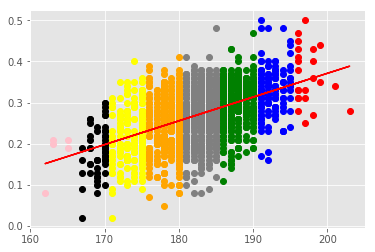

In [32]:
from scipy import stats
import numpy as np
heightlist = list(df_air_duel.height)
successlist = list(df_air_duel.success)
slope, intercept, r_value, p_value, std_err = stats.linregress(heightlist, successlist)
def predict(x):
       return slope * x + intercept
fitLine = predict(np.array(heightlist))
for k in range(len(heightlist)):
    if heightlist[k] <= 165 : 
        plt.plot(heightlist[k],successlist[k],'o',color = 'pink')
    elif heightlist[k] > 165 and heightlist[k] <= 170  : 
        plt.plot(heightlist[k],successlist[k],'o',color = 'black')
    elif heightlist[k] > 170 and heightlist[k] <= 175  : 
        plt.plot(heightlist[k],successlist[k],'o',color = 'yellow')
    elif heightlist[k] > 175 and heightlist[k] <= 180  : 
        plt.plot(heightlist[k],successlist[k],'o',color = 'orange')
    elif heightlist[k] > 180 and heightlist[k] <= 185  : 
        plt.plot(heightlist[k],successlist[k],'o',color = 'grey')
    elif heightlist[k] > 185 and heightlist[k] <= 190  : 
        plt.plot(heightlist[k],successlist[k],'o',color = 'green')
    elif heightlist[k] > 190 and heightlist[k] <= 195  : 
        plt.plot(heightlist[k],successlist[k],'o',color = 'blue')
    else : 
        plt.plot(heightlist[k],successlist[k],'o',color = 'red')
plt.plot(heightlist, fitLine, c='r')

# RQ6

We have decided to analyze the correlation between the percentage of accurated passes of each team and the percentage of games won by the same team

The events dataset is very big, so we decided to analyze only the matches of the first week, to see if the number of matches won with a percentage of accurated passes greater than 80% is more than one half of the matches

In [21]:
# import libraries
import pandas as pd
import json

In [22]:
# path for json events file 
pathEvents = 'events_England.json'
# read the events file and save to data
with open(pathEvents) as json_events:
    events = json.load(json_events)

In [23]:
# creation of events dataframe from data
dfEvents = pd.DataFrame(events)

In [24]:
# path for json teams file 
pathTeams = 'teams.json'
# read the teams file and save to data
with open(pathTeams) as json_teams:
    teams = json.load(json_teams)

In [25]:
# creation of teams dataframe from data
dfTeams = pd.DataFrame(teams)

In [26]:
# select club teams
club_teams = dfTeams[dfTeams['type'] == 'club']

In [27]:
# select teams of premier league
english_clubs = club_teams[club_teams.area.apply(lambda x: (x['name'] == 'England' or x['name'] == 'Wales'))]

In [28]:
# creation of a list with the teams' ids
english_clubs_list=english_clubs['wyId'].tolist()

In [29]:
# select premier league events
premier_league_events = dfEvents[dfEvents.teamId.isin(english_clubs_list)]

In [30]:
# select premier league passes
premier_league_passes = premier_league_events.loc[premier_league_events.eventName=="Pass"]

In [31]:
# path for json matches file 
pathMatches = 'matches_England.json'
# read the matches file and save to data
with open(pathMatches) as json_matches:
    matches = json.load(json_matches)

In [32]:
# creation of matches dataframe from data
dfMatches = pd.DataFrame(matches)

In [33]:
# order matches by gameweek
ordered_matches = dfMatches.sort_values(by='gameweek', ascending=True)

In [61]:
# select matches of first week
ordered_matches_week1=ordered_matches.loc[ordered_matches.gameweek==1]

,competitionId,date,dateutc,duration,gameweek,label,referees,roundId,seasonId,status,teamsData,venue,winner,wyId
379,364,"August 11, 2017 at 8:45:00 PM GMT+2",2017-08-11 18:45:00,Regular,1,"Arsenal - Leicester City, 4 - 3","[{'refereeId': 385909, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'1609': {'scoreET': 0, 'coachId': 7845, 'side...",Emirates Stadium,1609,2499719
370,364,"August 13, 2017 at 5:00:00 PM GMT+2",2017-08-13 15:00:00,Regular,1,"Manchester United - West Ham United, 4 - 0","[{'refereeId': 384888, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'1633': {'scoreET': 0, 'coachId': 269869, 'si...",Old Trafford,1611,2499724
371,364,"August 13, 2017 at 2:30:00 PM GMT+2",2017-08-13 12:30:00,Regular,1,"Newcastle United - Tottenham Hotspur, 0 - 2","[{'refereeId': 385911, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'1613': {'scoreET': 0, 'coachId': 210700, 'si...",St. James' Park,1624,2499725
372,364,"August 12, 2017 at 6:30:00 PM GMT+2",2017-08-12 16:30:00,Regular,1,"Brighton & Hove Albion - Manchester City, 0 - 2","[{'refereeId': 384965, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'1651': {'scoreET': 0, 'coachId': 8093, 'side...",The American Express Community Stadium,1625,2499720
373,364,"August 12, 2017 at 4:00:00 PM GMT+2",2017-08-12 14:00:00,Regular,1,"Chelsea - Burnley, 2 - 3","[{'refereeId': 378951, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'1646': {'scoreET': 0, 'coachId': 8880, 'side...",Stamford Bridge,1646,2499721
378,364,"August 12, 2017 at 1:30:00 PM GMT+2",2017-08-12 11:30:00,Regular,1,"Watford - Liverpool, 3 - 3","[{'refereeId': 378952, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'1644': {'scoreET': 0, 'coachId': 71037, 'sid...",Vicarage Road Stadium,0,2499727
375,364,"August 12, 2017 at 4:00:00 PM GMT+2",2017-08-12 14:00:00,Regular,1,"Everton - Stoke City, 1 - 0","[{'refereeId': 385915, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'1623': {'scoreET': 0, 'coachId': 268779, 'si...",Goodison Park,1623,2499723
376,364,"August 12, 2017 at 4:00:00 PM GMT+2",2017-08-12 14:00:00,Regular,1,"Southampton - Swansea City, 0 - 0","[{'refereeId': 385916, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'10531': {'scoreET': 0, 'coachId': 381291, 's...",St. Mary's Stadium,0,2499726
377,364,"August 12, 2017 at 4:00:00 PM GMT+2",2017-08-12 14:00:00,Regular,1,"West Bromwich Albion - AFC Bournemouth, 1 - 0","[{'refereeId': 379443, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'1659': {'scoreET': 0, 'coachId': 8934, 'side...",The Hawthorns,1627,2499728
374,364,"August 12, 2017 at 4:00:00 PM GMT+2",2017-08-12 14:00:00,Regular,1,"Crystal Palace - Huddersfield Town, 0 - 3","[{'refereeId': 381851, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'1628': {'scoreET': 0, 'coachId': 268775, 'si...",Selhurst Park,1673,2499722


In [63]:
# creation of a list with the ids of the first week matches
ordered_matches_week1_list=ordered_matches_week1['wyId'].tolist()

[2499719,
 2499724,
 2499725,
 2499720,
 2499721,
 2499727,
 2499723,
 2499726,
 2499728,
 2499722]

In [36]:
# select passes of first week
premier_league_passes_week1 = premier_league_passes[premier_league_passes.matchId.isin(ordered_matches_week1_list)]

,eventId,eventName,eventSec,id,matchId,matchPeriod,playerId,positions,subEventId,subEventName,tags,teamId
0,8,Pass,2.758649,177959171,2499719,1H,25413,"[{'y': 49, 'x': 49}, {'y': 78, 'x': 31}]",85,Simple pass,[{'id': 1801}],1609
1,8,Pass,4.946850,177959172,2499719,1H,370224,"[{'y': 78, 'x': 31}, {'y': 75, 'x': 51}]",83,High pass,[{'id': 1801}],1609
2,8,Pass,6.542188,177959173,2499719,1H,3319,"[{'y': 75, 'x': 51}, {'y': 71, 'x': 35}]",82,Head pass,[{'id': 1801}],1609
3,8,Pass,8.143395,177959174,2499719,1H,120339,"[{'y': 71, 'x': 35}, {'y': 95, 'x': 41}]",82,Head pass,[{'id': 1801}],1609
4,8,Pass,10.302366,177959175,2499719,1H,167145,"[{'y': 95, 'x': 41}, {'y': 88, 'x': 72}]",85,Simple pass,[{'id': 1801}],1609
5,8,Pass,12.548934,177959177,2499719,1H,3319,"[{'y': 88, 'x': 72}, {'y': 75, 'x': 77}]",85,Simple pass,[{'id': 1802}],1609
6,8,Pass,13.961228,177959186,2499719,1H,8653,"[{'y': 25, 'x': 23}, {'y': 15, 'x': 39}]",82,Head pass,[{'id': 1801}],1631
9,8,Pass,15.320341,177959178,2499719,1H,167145,"[{'y': 80, 'x': 67}, {'y': 61, 'x': 59}]",82,Head pass,"[{'id': 1401}, {'id': 1801}]",1609
10,8,Pass,18.051875,177959179,2499719,1H,49876,"[{'y': 61, 'x': 59}, {'y': 45, 'x': 45}]",82,Head pass,[{'id': 1801}],1609
11,8,Pass,20.426527,177959180,2499719,1H,14869,"[{'y': 45, 'x': 45}, {'y': 54, 'x': 71}]",83,High pass,[{'id': 1801}],1609


In [37]:
# select columns needed from dataframe
premier_league_passes_week1_new=premier_league_passes_week1[['tags', 'teamId']]
ordered_matches_week1_new=ordered_matches_week1[['teamsData', 'winner']]

In [74]:
count=0      # variable to count the matches which satisfy the hypothesis that accurated passages and number of won matches are correlated
for i in english_clubs_list:
    nPasses=0         # number of passages of the team in first week
    nAccPasses=0     # number ofaccurated passages of the team in first week
    won=0       # boolean variable (1 if the match of the first week is won, 0 otherwise)
    # loop on the rows of passes' dataframe
    for index,row in premier_league_passes_week1_new.iterrows():
        if row['teamId']==int(i):
            nPasses+=1    # incrementation of passes' number
            for j in range(len(row.tags)):
                if row.tags[j]['id'] == 1801:
                    nAccPasses+=1     # incrementation of accurated passes
    # loop on the rows of matches' dataframe
    for index, row in ordered_matches_week1_new.iterrows():
        if row['winner']==int(i):
            won=1              # variable to 1 if match is won
    perc=(nAccPasses/nPasses)*100    # percentage of accurated passes
    if (perc>80 and won==1):
        count+=1       # incrementation of the variable if the match was won and percentage was more than 80%
if count>5:          # hypothesis considered as true if count matches is more than the half 
    print("Correlated")
else:               # and as false otherwise
    print("Not correlated")

Correlated


# CRQ1

In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt

# OPENING THE FILES (IF YOU PASTE ON JUPYTER NOTEBOOK UPLOAD THE FILES AND JUST PUT 'matches-England.json" AS PATH)
with open('matches_England.json') as json_file:
    jmatches = json.load(json_file)

with open('teams.json') as json_file:
    jteams = json.load(json_file)
    
with open('events_England.json') as json_file:
    jevents = json.load(json_file)
    
with open('players.json') as json_file:
    play = json.load(json_file)
    
    
# CREATING DATA FRAME FROM FILES
match = pd.DataFrame(jmatches)
teams = pd.DataFrame(jteams)
events = pd.DataFrame(jevents)
plyer =  pd.DataFrame(play) 

In [2]:
#pd.read_json('matches_England.json')
# from pandas.io.json import json_normalize
# json_normalize(jmatches, 'teamsData')

In [3]:
# make the time intervals

# def eventtime(matchPeriod, eventSec):

#     import math
#     if math.ceil(eventSec/60)>45:
#         if matchPeriod == '1H':
#             return '45+'
#         else:
#             return '90+'
#     elif matchPeriod == '2H':
#         return math.floor(math.ceil(eventSec/60)/10+4.5)
#     else:
#         return math.floor(math.ceil(eventSec/60)/10)
def eventtime(matchPeriod, eventSec):

    import math
    if math.ceil(eventSec/60)>45:
        if matchPeriod == '1H':
            return '45+'
        else:
            return '90+'
    if matchPeriod == '1H':       
        if math.ceil(eventSec/60) <=9:
            return'0-9'
        elif math.ceil(eventSec/60) <=18:
            return'09-18'
        elif math.ceil(eventSec/60) <=27:
            return'18-27'    
        elif math.ceil(eventSec/60 )<=36:
            return'27-36'
        elif math.ceil(eventSec/60)<=45:
            return'36-45'

    if matchPeriod == '2H':      
        if math.ceil(eventSec/60)<=9:
            return '45-54'
        elif math.ceil(eventSec/60)<=18:
            return '54-63'
        elif math.ceil(eventSec/60)<=27:
            return '63-72'    
        elif math.ceil(eventSec/60)<=36:
            return '72-81'
        elif math.ceil(eventSec/60)<=45:
            return '81-90'     
    
    
events['timeintervals'] = events.apply(lambda x: eventtime(x['matchPeriod'], x['eventSec']), axis=1)

In [4]:
## find the goals
def goals(x):
    
    for i in x:
        if i['id']==101:
            return 1
        
events['golas'] = events['tags'].apply(goals)

In [5]:
goaltime = events[['timeintervals','golas']]

In [6]:
goaltime.dropna(axis=0, how='any', inplace= True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [7]:
## goaltime.groupby('timeintervals' ).size().plot.bar()

In [8]:
## goaltime.groupby('timeintervals').sum().plot.bar()

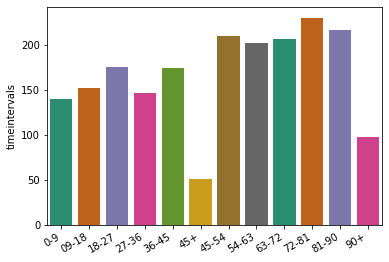

In [9]:
ss = pd.DataFrame(goaltime['timeintervals'].value_counts(), index=['0-9','09-18','18-27','27-36','36-45', '45+', '45-54','54-63', '63-72', '72-81', '81-90', '90+'] )
import seaborn as sns

ax =plt.subplot(111)
ax = sns.barplot(ss.index , y = ss['timeintervals'] , data = ss, palette = 'Dark2' )
ax.set_xticklabels(ax.get_xticklabels(),rotation=30,  ha='right')
plt.show()

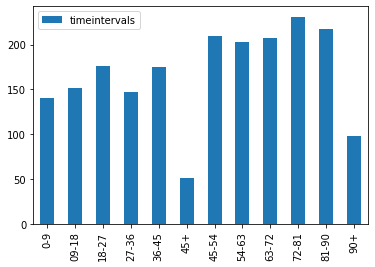

In [10]:
ss.plot.bar()

In [11]:
## goaltime['timeintervals'].value_counts().plot.bar()

In [12]:
#events[['teamId', 'timeintervals','golas']].groupby('timeintervals').get_group(8).groupby('teamId').sum().sort_values(by=['golas'], ascending = False).head(10)

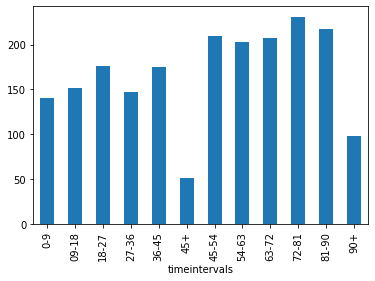

In [13]:
# the number of all goals in time intervals

events[['teamId', 'timeintervals','golas']].dropna(axis =0, how = 'any').groupby(['timeintervals']).size().plot.bar()

In [14]:
plyergoal = events[['playerId', 'timeintervals','golas']].dropna(axis=0, how='any')

In [15]:
# Find the players ID with at leat one goal at 8 intervals
plyid = plyergoal.groupby('playerId').agg(lambda x: len(x['timeintervals'].value_counts())>=8).groupby('timeintervals').get_group(True).index

In [16]:
pd.merge(pd.pivot_table(plyergoal, columns= 'timeintervals', index='playerId', values='golas', aggfunc = sum).dropna(axis=0,thresh=8 ), plyer[plyer['wyId'].apply(lambda x: x in plyid)==True][['wyId', 'shortName']].set_index('wyId'),left_index=True,right_index=True).head()

,0-9,09-18,18-27,27-36,36-45,45+,45-54,54-63,63-72,72-81,81-90,90+,shortName
3324,1.0,1.0,NaN,2.0,2.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,\u00c1lvaro Morata
3429,1.0,2.0,3.0,NaN,5.0,1.0,3.0,5.0,5.0,2.0,4.0,3.0,T. Courtois
3582,2.0,2.0,2.0,4.0,1.0,NaN,4.0,6.0,2.0,3.0,2.0,1.0,Adri\u00e1n
7847,3.0,7.0,3.0,6.0,6.0,1.0,6.0,3.0,6.0,6.0,9.0,NaN,\u0141. Fabia\u0144ski
7882,4.0,6.0,4.0,5.0,1.0,NaN,5.0,4.0,6.0,6.0,5.0,2.0,P. \u010cech


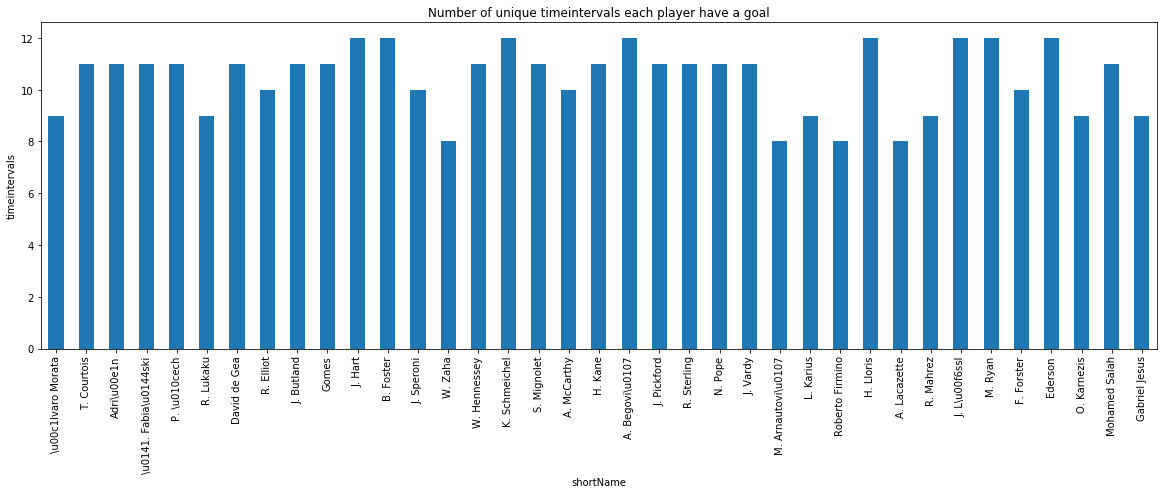

In [17]:
plt.figure(figsize=(20,6))
pd.merge(pd.pivot_table(plyergoal, columns= 'timeintervals', index='playerId', values='golas', aggfunc = sum).dropna(axis=0,thresh=8 ), plyer[plyer['wyId'].apply(lambda x: x in plyid)==True][['wyId', 'shortName']].set_index('wyId'),left_index=True,right_index=True).set_index('shortName').count(axis=1).plot.bar()
plt.ylabel('timeintervals')
plt.title('Number of unique timeintervals each player have a goal')
plt.show()

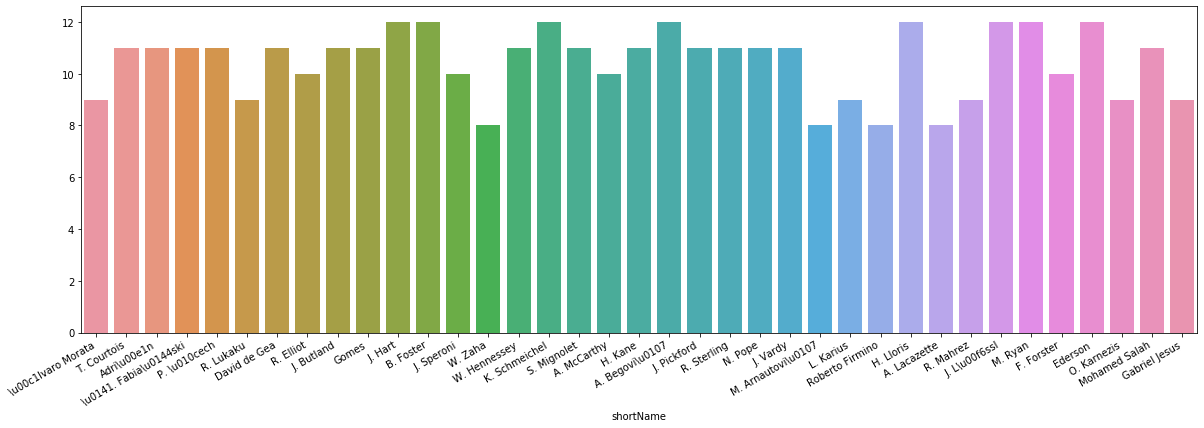

In [18]:
ee =pd.merge(pd.pivot_table(plyergoal, columns= 'timeintervals', index='playerId', values='golas', aggfunc = sum).dropna(axis=0,thresh=8 ), plyer[plyer['wyId'].apply(lambda x: x in plyid)==True][['wyId', 'shortName']].set_index('wyId'),left_index=True,right_index=True).set_index('shortName').count(axis=1)
fig = plt.figure(figsize=(20,6))
ax = plt.subplot(111)
ax = sns.barplot(ee.keys() , ee.values, ax = ax )
ax.set_xticklabels(ax.get_xticklabels(),rotation=30,  ha='right')
plt.show()

In [19]:
ee.values

array([ 9, 11, 11, 11, 11,  9, 11, 10, 11, 11, 12, 12, 10,  8, 11, 12, 11,
       10, 11, 12, 11, 11, 11, 11,  8,  9,  8, 12,  8,  9, 12, 12, 10, 12,
        9, 11,  9], dtype=int64)

In [20]:
plyer[plyer['wyId'].apply(lambda x: x in plyid)==True][['wyId', 'shortName']].set_index('wyId').head(7)

,shortName
wyId,
71654,Ederson
7847,\u0141. Fabia\u0144ski
7905,R. Lukaku
7910,David de Gea
8094,J. Butland
8480,K. Schmeichel
8514,S. Mignolet


In [21]:
# players name with at leat one goal at 8 intervals
plyer[plyer['wyId'].apply(lambda x: x in plyid)==True][['firstName','lastName','shortName']].head()

,firstName,lastName,shortName
568,Ederson,Santana de Moraes,Ederson
654,\u0141ukasz,Fabia\u0144ski,\u0141. Fabia\u0144ski
671,Romelu,Lukaku Menama,R. Lukaku
673,David,de Gea Quintana,David de Gea
700,Jack,Butland,J. Butland


In [22]:
# second approch to find the players ID who have goals in 8 intervals 
d ={}
for  x,y in dict(plyergoal.groupby(['playerId','timeintervals']).size()).keys():
    d.setdefault(x, []).append(y)

plys =[]

for i in d:
    if len(d[i])>=8:
        plys.append(i)
print('Number of players with goals at 8 or more intervals: ', len(plys ) )      

Number of players with goals at 8 or more intervals:  37


# CRQ2

In [23]:
with open('matches_Spain.json') as json_file:
    spmatches = json.load(json_file)
    
with open('events_Spain.json') as json_file:
    spevent = json.load(json_file)

    
spmatch = pd.DataFrame(spmatches)
spevents = pd.DataFrame(spevent)    

In [24]:
##  Barcelona - Real Madrid played on the 6 May 2018
spmatch[spmatch['label']=='Barcelona - Real Madrid, 2 - 2']


,status,roundId,gameweek,teamsData,seasonId,dateutc,winner,venue,wyId,label,date,referees,duration,competitionId
23,Played,4406122,36,"{'675': {'scoreET': 0, 'coachId': 275283, 'sid...",181144,2018-05-06 18:45:00,0,Camp Nou,2565907,"Barcelona - Real Madrid, 2 - 2","May 6, 2018 at 8:45:00 PM GMT+2","[{'refereeId': 378950, 'role': 'referee'}, {'r...",Regular,795


In [25]:
spmatches[23]

{'status': 'Played',
 'roundId': 4406122,
 'gameweek': 36,
 'teamsData': {'675': {'scoreET': 0,
   'coachId': 275283,
   'side': 'away',
   'teamId': 675,
   'score': 2,
   'scoreP': 0,
   'hasFormation': 1,
   'formation': {'bench': [{'playerId': 282441,
      'ownGoals': '0',
      'redCards': '0',
      'goals': 'null',
      'yellowCards': '0'},
     {'playerId': 344132,
      'ownGoals': '0',
      'redCards': '0',
      'goals': 'null',
      'yellowCards': '0'},
     {'playerId': 326523,
      'ownGoals': '0',
      'redCards': '0',
      'goals': 'null',
      'yellowCards': '0'},
     {'playerId': 3785,
      'ownGoals': '0',
      'redCards': '0',
      'goals': 'null',
      'yellowCards': '0'},
     {'playerId': 288091,
      'ownGoals': '0',
      'redCards': '0',
      'goals': 'null',
      'yellowCards': '0'},
     {'playerId': 69404,
      'ownGoals': '0',
      'redCards': '0',
      'goals': 'null',
      'yellowCards': '0'},
     {'playerId': 4498,
      'ownGoals':

In [26]:
for i in range(len(play)):
    if play[i]['shortName']== 'Cristiano Ronaldo':
        print(play[i])
    

{'passportArea': {'name': 'Portugal', 'id': '620', 'alpha3code': 'PRT', 'alpha2code': 'PT'}, 'weight': 83, 'firstName': 'Cristiano Ronaldo', 'middleName': '', 'lastName': 'dos Santos Aveiro', 'currentTeamId': 3159, 'birthDate': '1985-02-05', 'height': 187, 'role': {'code2': 'FW', 'code3': 'FWD', 'name': 'Forward'}, 'birthArea': {'name': 'Portugal', 'id': '620', 'alpha3code': 'PRT', 'alpha2code': 'PT'}, 'wyId': 3322, 'foot': 'right', 'shortName': 'Cristiano Ronaldo', 'currentNationalTeamId': 9905}


In [27]:
for i in range(len(play)):
    if play[i]['shortName']== 'L. Messi':
        print(play[i])

{'passportArea': {'name': 'Spain', 'id': '724', 'alpha3code': 'ESP', 'alpha2code': 'ES'}, 'weight': 72, 'firstName': 'Lionel Andr\\u00e9s', 'middleName': '', 'lastName': 'Messi Cuccittini', 'currentTeamId': 676, 'birthDate': '1987-06-24', 'height': 170, 'role': {'code2': 'FW', 'code3': 'FWD', 'name': 'Forward'}, 'birthArea': {'name': 'Argentina', 'id': '32', 'alpha3code': 'ARG', 'alpha2code': 'AR'}, 'wyId': 3359, 'foot': 'left', 'shortName': 'L. Messi', 'currentNationalTeamId': 12274}


In [28]:
ronaldo = spevents[(spevents['playerId']==3322)& (spevents['matchId']==2565907)& ((spevents['eventId']==1)|(spevents['eventId']==3)|(spevents['eventId']==8)|(spevents['eventId']==10))]
messi = spevents[(spevents['playerId']==3359)& (spevents['matchId']==2565907)& ((spevents['eventId']==1)|(spevents['eventId']==3)|(spevents['eventId']==8)|(spevents['eventId']==10))]
##  2565876

In [29]:
# built a dataframe of the positions

def position(positionlistdict):
    xstart = []
    ystart = []

    xstop = []
    ystop = []

    for i in positionlistdict.index:
            xstart.append(positionlistdict[i][0]['x'])
            ystart.append(positionlistdict[i][0]['y'])
            xstop.append(positionlistdict[i][1]['x'])
            ystop.append(positionlistdict[i][1]['y'])
    
    return  pd.DataFrame(zip(xstart,ystart,xstop,ystop ), columns=['xstart','ystart','xstop','ystop'] )       
     

In [30]:
ronaldopos = position(ronaldo['positions'])
messipos = position(messi['positions'])

In [31]:
def createPitch(ax):

    #Pitch Outline & Centre Line
    plt.plot([0,0],[0,90], color="black")
    plt.plot([0,130],[90,90], color="black")
    plt.plot([130,130],[90,0], color="black")
    plt.plot([130,0],[0,0], color="black")
    plt.plot([65,65],[0,90], color="black")
    
    #Left Penalty Area
    plt.plot([16.5,16.5],[65,25],color="black")
    plt.plot([0,16.5],[65,65],color="black")
    plt.plot([16.5,0],[25,25],color="black")
    
    #Right Penalty Area
    plt.plot([130,113.5],[65,65],color="black")
    plt.plot([113.5,113.5],[65,25],color="black")
    plt.plot([113.5,130],[25,25],color="black")
    
    #Left 6-yard Box
    plt.plot([0,5.5],[54,54],color="black")
    plt.plot([5.5,5.5],[54,36],color="black")
    plt.plot([5.5,0.5],[36,36],color="black")
    
    #Right 6-yard Box
    plt.plot([130,124.5],[54,54],color="black")
    plt.plot([124.5,124.5],[54,36],color="black")
    plt.plot([124.5,130],[36,36],color="black")
    
    #Prepare Circles
    centreCircle = plt.Circle((65,45),9.15,color="black",fill=False)
    centreSpot = plt.Circle((65,45),0.8,color="black")
    leftPenSpot = plt.Circle((11,45),0.8,color="black")
    rightPenSpot = plt.Circle((119,45),0.8,color="black")
    
    #Draw Circles
    ax.add_patch(centreCircle)
    ax.add_patch(centreSpot)
    ax.add_patch(leftPenSpot)
    ax.add_patch(rightPenSpot)
    
    #Prepare Arcs
    leftArc = Arc((11,45),height=18.3,width=18.3,angle=0,theta1=310,theta2=50,color="black")
    rightArc = Arc((119,45),height=18.3,width=18.3,angle=0,theta1=130,theta2=230,color="black")

    #Draw Arcs
    ax.add_patch(leftArc)
    ax.add_patch(rightArc)
    

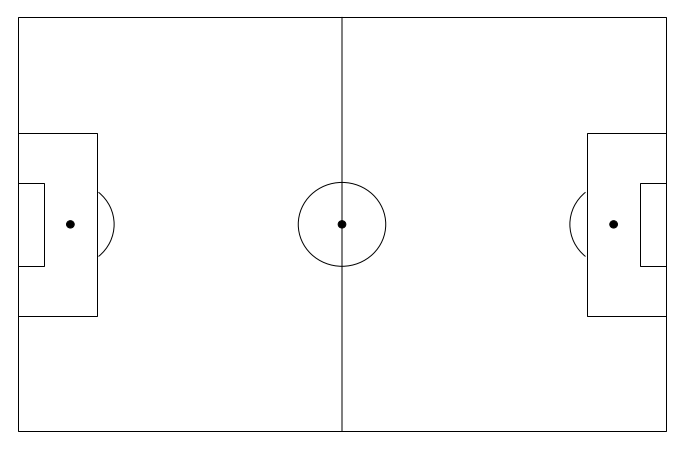

In [32]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, ConnectionPatch, Arc

def draw_pitch(ax):
    # focus on only half of the pitch
    #Pitch Outline & Centre Line
    Pitch = Rectangle([0,0], width = 120, height = 80, fill = False)
    #Left, Right Penalty Area and midline
    LeftPenalty = Rectangle([0,22.3], width = 14.6, height = 35.3, fill = False)
    RightPenalty = Rectangle([105.4,22.3], width = 14.6, height = 35.3, fill = False)
    midline = ConnectionPatch([60,0], [60,80], "data", "data")

    #Left, Right 6-yard Box
    LeftSixYard = Rectangle([0,32], width = 4.9, height = 16, fill = False)
    RightSixYard = Rectangle([115.1,32], width = 4.9, height = 16, fill = False)


    #Prepare Circles
    centreCircle = plt.Circle((60,40),8.1,color="black", fill = False)
    centreSpot = plt.Circle((60,40),0.71,color="black")
    #Penalty spots and Arcs around penalty boxes
    leftPenSpot = plt.Circle((9.7,40),0.71,color="black")
    rightPenSpot = plt.Circle((110.3,40),0.71,color="black")
    leftArc = Arc((9.7,40),height=16.2,width=16.2,angle=0,theta1=310,theta2=50,color="black")
    rightArc = Arc((110.3,40),height=16.2,width=16.2,angle=0,theta1=130,theta2=230,color="black")
    
    element = [Pitch, LeftPenalty, RightPenalty, midline, LeftSixYard, RightSixYard, centreCircle, 
               centreSpot, rightPenSpot, leftPenSpot, leftArc, rightArc]
    for i in element:
        ax.add_patch(i)


fig=plt.figure(figsize=(12,8)) #set up the figures
#fig.set_size_inches(7, 5)
ax=fig.add_subplot(1,1,1)
draw_pitch(ax) #overlay our different objects on the pitch
plt.ylim(-2, 82)
plt.xlim(-2, 122)
plt.axis('off')
plt.show()


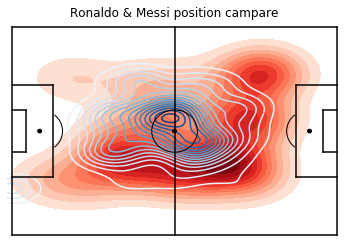

In [33]:
import seaborn as sns

ax = sns.kdeplot(list(ronaldopos['xstart'])+list(ronaldopos['xstop']), list(ronaldopos['ystart'])+ list(ronaldopos['ystop']), shade= True, n_levels=15 ,kernel='cos' , cmap="Reds", shade_lowest=False)
ax1 = ax.twinx()
sns.kdeplot(list(messipos['xstart'])+list(messipos['xstop']), list(messipos['ystart'])+ list(messipos['ystop']), shade= False, n_levels=15 ,kernel='cos' , cmap="Blues", shade_lowest= False, ax = ax)
createPitch(ax1)
plt.title('Ronaldo & Messi position campare')
# plt.xticks([])
# plt.yticks([])
plt.ylim(-2, 92)
plt.xlim(-2, 132)
ax.axis('off')
plt.axis('off')
plt.show()

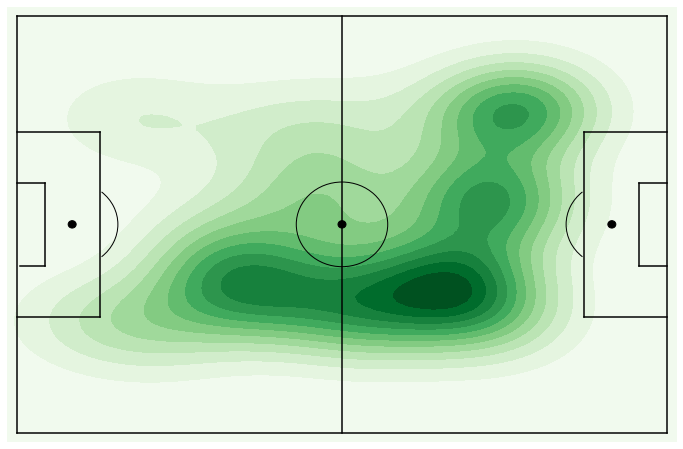

In [34]:
# Ronaldo
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(12,8))
ax=fig.add_subplot(1,1,1)

ax1 = ax.twinx()

createPitch(ax1)
ax = sns.kdeplot(list(ronaldopos['xstart'])+list(ronaldopos['xstop']), list(ronaldopos['ystart'])+ list(ronaldopos['ystop']), shade="True", n_levels=15 ,kernel='cos' , cmap="Greens", ax =ax)

plt.axis('off')
ax.axis('off')

plt.ylim(-2, 92)
plt.xlim(-2, 132)
plt.show()

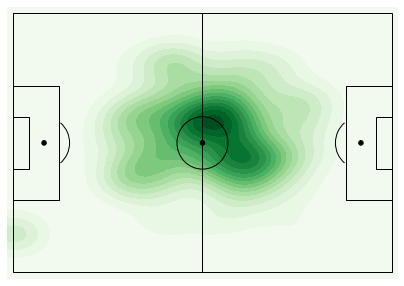

In [35]:
# Messi
fig = plt.figure(figsize=(7,5))
ax=fig.add_subplot(1,1,1)

ax1 = ax.twinx()
sns.kdeplot(list(messipos['xstart'])+list(messipos['xstop']), list(messipos['ystart'])+ list(messipos['ystop']), shade="True", n_levels=15 ,kernel='cos' , cmap="Greens" , ax=ax)


#ax=fig.add_subplot(1,1,1)
draw_pitch(ax1) #overlay our different objects on the pitch

plt.ylim(-2, 82)
plt.xlim(-2, 122)
plt.axis('off')
ax.axis('off')

plt.show()

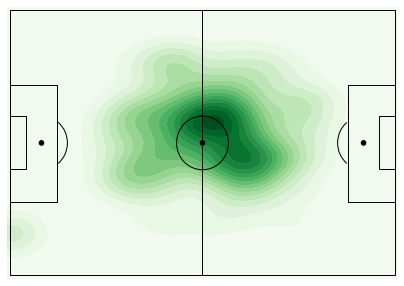

In [36]:
# Messi
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(1,1,1)

ax1 =ax.twinx()
ax = sns.kdeplot(list(messipos['xstart'])+list(messipos['xstop']), list(messipos['ystart'])+ list(messipos['ystop']), shade="True", n_levels=15 ,kernel='cos' , cmap="Greens", ax =ax)
 #overlay our different objects on the pitch

draw_pitch(ax1)

plt.ylim(-1, 81)
plt.xlim(-1, 121)
plt.axis('off')
ax.axis('off')

plt.show()

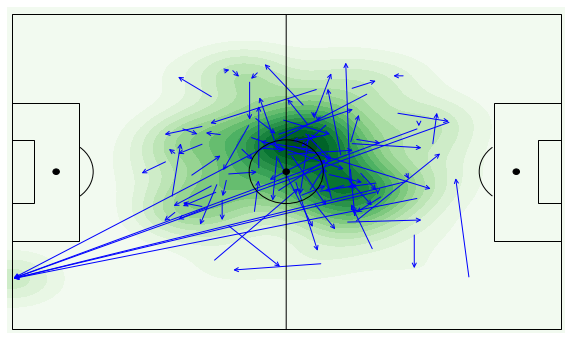

In [37]:
# Messi

fig=plt.figure() #set up the figures
fig.set_size_inches(10, 6)
ax=fig.add_subplot(1,1,1)


ax = sns.kdeplot(list(messipos['xstart'])+list(messipos['xstop']), list(messipos['ystart'])+ list(messipos['ystop']), shade="True", n_levels=15 ,kernel='cos' , cmap="Greens", ax =ax)
for i in messipos.index:
    # annotate draw an arrow from a current position to pass_end_location
    ax.annotate("", xy = (messipos['xstop'][i] , messipos['ystop'][i]), xycoords = 'data',
                   xytext = (messipos['xstart'][i] , messipos['ystart'][i]), textcoords = 'data',
                   arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = "blue"))

ax1 = ax.twinx()
draw_pitch(ax1)
plt.axis('off')
ax.axis('off')

plt.ylim(-1, 82)
plt.xlim(-1, 121)

plt.show()

In [38]:
plyer[plyer['firstName']=='Cristiano Ronaldo']['role']

185    {'code2': 'FW', 'code3': 'FWD', 'name': 'Forwa...
Name: role, dtype: object

In [39]:
with open('matches_Italy.json') as json_file:
    itmatches = json.load(json_file)
    
with open('events_Italy.json') as json_file:
    itevent = json.load(json_file)

    
itmatch = pd.DataFrame(itmatches)
itevents = pd.DataFrame(itevent)  

In [40]:
##   Juventus - Napoli played on the 22 April 2018
itmatch[itmatch['label']== "Juventus - Napoli, 0 - 1"]

,status,roundId,gameweek,teamsData,seasonId,dateutc,winner,venue,wyId,label,date,referees,duration,competitionId
41,Played,4406278,34,"{'3159': {'scoreET': 0, 'coachId': 20386, 'sid...",181248,2018-04-22 18:45:00,3187,,2576295,"Juventus - Napoli, 0 - 1","April 22, 2018 at 8:45:00 PM GMT+2","[{'refereeId': 377206, 'role': 'referee'}, {'r...",Regular,524


In [41]:
itmatches[41]

{'status': 'Played',
 'roundId': 4406278,
 'gameweek': 34,
 'teamsData': {'3159': {'scoreET': 0,
   'coachId': 20386,
   'side': 'home',
   'teamId': 3159,
   'score': 0,
   'scoreP': 0,
   'hasFormation': 1,
   'formation': {'bench': [{'playerId': 21128,
      'ownGoals': '2',
      'redCards': '0',
      'goals': '0',
      'yellowCards': '0'},
     {'playerId': 20458,
      'ownGoals': '2',
      'redCards': '0',
      'goals': '0',
      'yellowCards': '0'},
     {'playerId': 70084,
      'ownGoals': '2',
      'redCards': '0',
      'goals': '0',
      'yellowCards': '0'},
     {'playerId': 246061,
      'ownGoals': '2',
      'redCards': '0',
      'goals': '0',
      'yellowCards': '0'},
     {'playerId': 134427,
      'ownGoals': '2',
      'redCards': '0',
      'goals': '0',
      'yellowCards': '0'},
     {'playerId': 361807,
      'ownGoals': '2',
      'redCards': '0',
      'goals': '0',
      'yellowCards': '0'},
     {'playerId': 7849,
      'ownGoals': '2',
      'redC

In [42]:
plyer[plyer['wyId']==21315]

,passportArea,weight,firstName,middleName,lastName,currentTeamId,birthDate,height,role,birthArea,wyId,foot,shortName,currentNationalTeamId
1658,"{'name': 'Italy', 'id': '380', 'alpha3code': '...",65,Jorge Luiz,,Frello Filho,3187,1991-12-20,180,"{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...","{'name': 'Brazil', 'id': '76', 'alpha3code': '...",21315,right,Jorginho,3757


In [43]:
plyer[plyer['wyId']==20443]

,passportArea,weight,firstName,middleName,lastName,currentTeamId,birthDate,height,role,birthArea,wyId,foot,shortName,currentNationalTeamId
1482,"{'name': 'Luxembourg', 'id': '442', 'alpha3cod...",74,Miralem,,Pjani\u0107,3159,1990-04-02,180,"{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...","{'name': 'Bosnia-Herzegovina', 'id': '70', 'al...",20443,right,M. Pjani\u0107,null


In [44]:
Jorginho = itevents[(itevents['playerId']==21315)& (itevents['matchId']==2576295)& (itevents['eventId']==8)]
Pjanic = itevents[(itevents['playerId']==20443)& (itevents['matchId']==2576295)& (itevents['eventId']==8)] 

In [45]:
import numpy as np
Jorginhoaccurate  = position(Jorginho[Jorginho['tags'].apply(lambda x: len([k for k in x if k['id']==1801]))==0]['positions'])
Pjanicaccurate = position(Pjanic[Pjanic['tags'].apply(lambda x: len([k for k in x if k['id']==1801]))==0]['positions'])

In [46]:
jorginhopos = position(Jorginho['positions'])
pjanicpos = position(Pjanic['positions'])

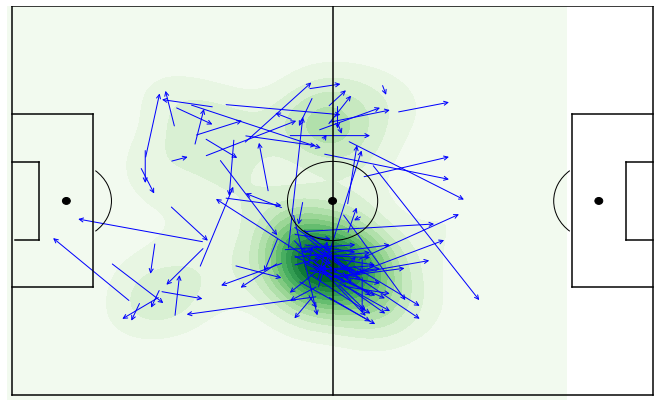

In [47]:
# jorginho

import seaborn as sns

fig=plt.figure(figsize= (10, 6)) #set up the figures
#fig.set_size_inches(7, 5)
ax=fig.add_subplot(1,1,1)

ax = sns.kdeplot(list(jorginhopos['xstart'])+list(jorginhopos['xstop']), list(jorginhopos['ystart'])+ list(jorginhopos['ystop']), shade="True", n_levels=15 ,kernel='cos' , cmap="Greens", ax= ax)
for i in jorginhopos.index:
    # annotate draw an arrow from a current position to pass_end_location
    ax.annotate("", xy = (jorginhopos['xstop'][i] , jorginhopos['ystop'][i]), xycoords = 'data',
                   xytext = (jorginhopos['xstart'][i] , jorginhopos['ystart'][i]), textcoords = 'data',
                   arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = "blue"))


ax1 = ax.twinx()
#draw_pitch(ax1)
createPitch(ax1)
plt.tight_layout()
plt.ylim(-1, 90)
plt.xlim(-1, 131)
plt.axis('off')
ax.axis('off')
plt.show()

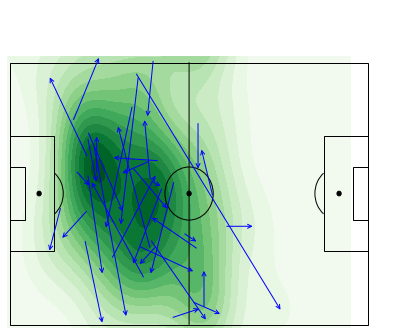

In [48]:
# pjanic
import matplotlib
fig=plt.figure(figsize=(7,5)) #set up the figures
#fig.set_size_inches(7, 5)
ax=fig.add_subplot(1,1,1)
#ax1 = ax.twinx()

sns.kdeplot(list(pjanicpos['xstart'])+list(pjanicpos['xstop']), list(pjanicpos['ystart'])+ list(pjanicpos['ystop']), shade="True", n_levels=15 ,kernel='cos' , cmap="Greens")
for i in pjanicpos.index:
    # annotate draw an arrow from a current position to pass_end_location
    ax.annotate("", xy = (pjanicpos['xstop'][i] , pjanicpos['ystop'][i]), xycoords = 'data',
                   xytext = (pjanicpos['xstart'][i] , pjanicpos['ystart'][i]), textcoords = 'data',
                   arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = "blue"))

#plt.gca().set_aspect('auto', 'datalim')
draw_pitch(ax)
#createPitch(ax)
#draw_pitch(ax)
# ax.axis('scaled')
#plt.imshow(img)
# plt.tight_layout()
plt.ylim(-1,82)
plt.xlim(-1, 130)
#plt.tight_layout()
#matplotlib.axes.Axes.set_aspect(ax ,aspect ='auto', adjustable='box', anchor='C')
#plt.gca().set_aspect(aspect ='auto')
#ax.autoscale(enable=True)
#ax.relim()
plt.axis('off')
plt.show()

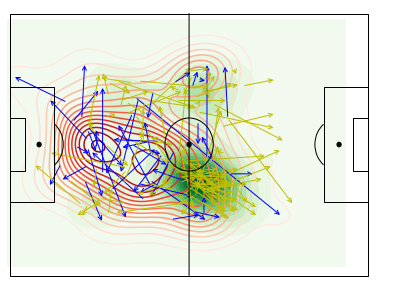

In [49]:
# compare the pass between two players

fig=plt.figure() #set up the figures
fig.set_size_inches(7, 5)
ax=fig.add_subplot(1,1,1)
ax1 = ax.twinx()
sns.kdeplot(list(jorginhopos['xstart'])+list(jorginhopos['xstop']), list(jorginhopos['ystart'])+ list(jorginhopos['ystop']), shade=True, n_levels=15 ,kernel='cos' , cmap="Greens" , ax =ax)
sns.kdeplot(list(pjanicpos['xstart'])+list(pjanicpos['xstop']), list(pjanicpos['ystart'])+ list(pjanicpos['ystop']), shade=False , n_levels=15 ,kernel='cos' , cmap="Reds", ax =ax)

for i in jorginhopos.index:
    try:
        # annotate draw an arrow from a current position to pass_end_location
        ax.annotate("", xy = (jorginhopos['xstop'][i] , jorginhopos['ystop'][i]), xycoords = 'data',
                       xytext = (jorginhopos['xstart'][i] , jorginhopos['ystart'][i]), textcoords = 'data',
                       arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = "y"))


        ax.annotate("", xy = (pjanicpos['xstop'][i] , pjanicpos['ystop'][i]), xycoords = 'data',
                       xytext = (pjanicpos['xstart'][i] , pjanicpos['ystart'][i]), textcoords = 'data',
                       arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = "blue"))    
    
    except:
        pass
    
draw_pitch(ax1)
plt.axis('off')
plt.ylim(-1,82)
plt.xlim(-1, 130)
ax.axis('off')
plt.show()

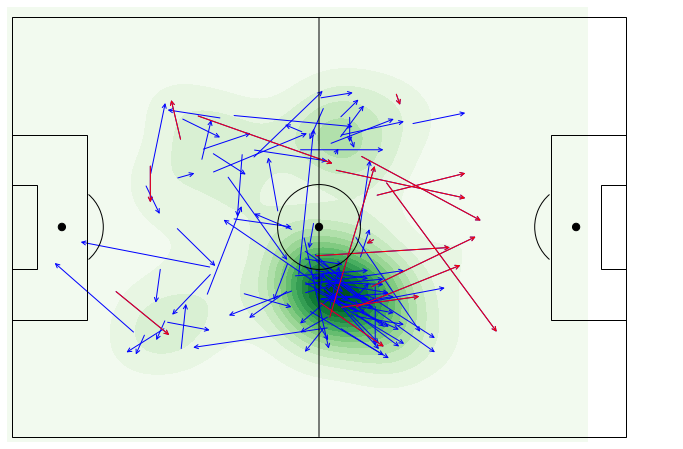

In [50]:
# compare the pass between two players

fig=plt.figure() #set up the figures
fig.set_size_inches(12, 8)
ax=fig.add_subplot(1,1,1)

ax1 = ax.twinx()
sns.kdeplot(list(jorginhopos['xstart'])+list(jorginhopos['xstop']), list(jorginhopos['ystart'])+ list(jorginhopos['ystop']), shade=True, n_levels=15 ,kernel='cos' , cmap="Greens" , ax =ax)

for i in jorginhopos.index:
    
    # annotate draw an arrow from a current position to pass_end_location
    ax.annotate("", xy = (jorginhopos['xstop'][i] , jorginhopos['ystop'][i]), xycoords = 'data',
                   xytext = (jorginhopos['xstart'][i] , jorginhopos['ystart'][i]), textcoords = 'data',
                   arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = "blue"))

for j in Jorginhoaccurate.index:
        ax.annotate("", xy = (Jorginhoaccurate['xstop'][j] , Jorginhoaccurate['ystop'][j]), xycoords = 'data',
                       xytext = (Jorginhoaccurate['xstart'][j] , Jorginhoaccurate['ystart'][j]), textcoords = 'data',
                       arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = "red"))    
    
    
draw_pitch(ax1)
plt.axis('off')
plt.ylim(-1,82)
plt.xlim(-1, 130)
ax.axis('off')
plt.show()

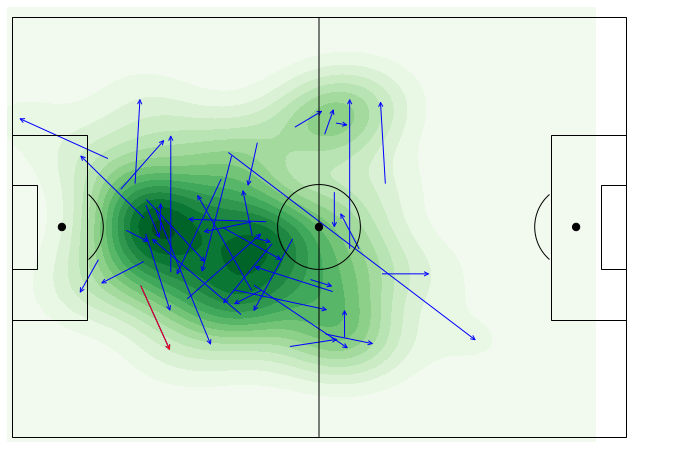

In [51]:
fig=plt.figure() #set up the figures
fig.set_size_inches(12, 8)
ax=fig.add_subplot(1,1,1)
ax1 = ax.twinx()
sns.kdeplot(list(pjanicpos['xstart'])+list(pjanicpos['xstop']), list(pjanicpos['ystart'])+ list(pjanicpos['ystop']), shade=True, n_levels=15 ,kernel='cos' , cmap="Greens", ax =ax)

    
for i in pjanicpos.index:
    # annotate draw an arrow from a current position to pass_end_location
    ax.annotate("", xy = (pjanicpos['xstop'][i] , pjanicpos['ystop'][i]), xycoords = 'data',
                   xytext = (pjanicpos['xstart'][i] , pjanicpos['ystart'][i]), textcoords = 'data',
                   arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = "blue"))

for j in Pjanicaccurate.index:
    ax.annotate("", xy = (Pjanicaccurate['xstop'][j] , Pjanicaccurate['ystop'][j]), xycoords = 'data',
                   xytext = (Pjanicaccurate['xstart'][j] , Pjanicaccurate['ystart'][j]), textcoords = 'data',
                   arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = "red"))    

draw_pitch(ax1)
plt.axis('off')
plt.ylim(-1,82)
plt.xlim(-1, 130)
ax.axis('off')
plt.show()